# E-COMMERCE CUSTOMER CHURN

# 1. Business Problem Understanding

**Context**

E-commerce (Electronic Commerce) merupakan perusahaan atau individual yang membeli dan menjual barang melalui internet. Kita juga dapat menyebutnya Online shopping sebagai salah satu cara dalam berbelanja. Tetapi, kondisi market pada bisnis e-commerce cenderung tidak konstan (berubah-ubah) sehingga menyebabkan problem yang serius yaitu customer loss. <br>

Customer merupakan salah satu aset penting dalam bisnis dan customer berperan penting dalam pengembangan pasar. Customer churn pada ecommerce diartikan customer yang berhenti berbelanja di applikasi ecommerce ini. Studi menunjukkan bahwa cost untuk menambah customer baru lebih tinggi dibandingkan dengan mempertahankan customer lama. Jika sebuah bisnis dapat menjaga hubungan yang baik dengan customer, mereka dapat mendapatkan keuntungan yang lebih dari customer lama. Jika customer retention rate meningkat sebanyak 5%, maka net present value sebuah perusahaan dapat meningkat sebanyak 25–95%. Ketika customer churn rate berkurang sebanyak 5%, maka average profit margin dapat meningkat sebanyak 25-85%. Maka dari itu, penting untuk mempertahankan customer lama dan mengambil keuntungan dari mereka serta mencegah kehilangan customer lama.

Sumber: Xiahou, X.; Harada, Y. B2C E-Commerce Customer Churn Prediction Based on K-Means and SVM. J. Theor. Appl. Electron. Commer. Res. 2022, 17, 458–475. https://doi.org/10.3390/jtaer17020024)


**Dampak Churn** <br>

- Kita asumsikan rata-rata belanja customer sebesar $500 dollar, jika perusahaan kehilangan 100 pelanggan dalam 1 tahun, maka nilai revenue yang hilang sebesar $50,000
- Kita asumsikan bahwa keuntungan pertahun dari ecommerce adalah $100.000 per tahun dengan customer churn rate 10%, jika customer churn rate berkurang sebanyak 5% maka keuntungan dapat meningkat (anggap saja 25% sesuai studi diatas), keuntungan pertahun menjadi sebesar $125.000
- Mencari customer baru (sebagai pengganti customer yang churn) membutuhkan lebih banyak biaya

**Problem Statement** <br>
Cost untuk menambah customer baru lebih tinggi. Maka dari itu harus dilakukan pencegahan agar customer tidak churn. Pemberian promo merupakan salah satu cara yang dapat dilakukan oleh perusahaan. Tetapi pemberian promo atau tindakan lainnya harus tepat kepada customer yang akan churn agar tindakan tersebut menjadi efisien dan berdampak kepada perusahaan.

**Variable** <br>
- Label: Semua feature (Tenure, WarehouseToHome, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount)
- Target: Churn


**Objective** <br>
Berdasarkan permasalahan diatas, perusahaan ingin mengetahui kemungkinan customer yang benar-benar akan churn agar dapat melakukan tindakan preventif dengan menggunakan model Machine Learning. Model machine learning harus benar-benar menghasilkan prediksi customer yang akan churn agar tindakan preventif yang dilakukan tepat sasaran dan efisien.
Perusahaan juga harus mengetahui faktor-faktor yang mempengaruhi customer itu churn, sehingga dapat melakukan improvement terhadap bisnis mereka.

**Action** <br>
Mengetahui customer yang akan churn dan feature apa yang mempengaruhinya sehingga mendapatkan solusi agar customer tidak churn.

**Value** <br>
- Mencegah kerugian akibat customer churn.
- Menentukan customer yang akan benar-benar churn agar bisa mencari solusi pencegahan agar customer tidak churn

**Confussion Matrix**

![](https://rapidminer.com/wp-content/uploads/2022/06/Confusion-Matrix-1.jpeg "Confusion Matrix")

*Target* <br>
- 1 : customer churn
- 0 : customer tidak churn

*Customer Matrix Statement* <br>
- TP (True Positif): customer yang diprediksi churn dan secara aktual churn
- TN (True Negatif): customer yang diprediksi tidak churn dan secara aktual tidak churn
- FP (False Positif): customer yang diprediksi churn tetapi secara aktual tidak churn
- FN (False Negatif): customer yang diprediksi tidak churn tetapi secara aktual churn

*Consequence* <br>
- FP: Jika nilai FP besar berarti akan terjadi banyak salah pemberian tindakan preventif (salah pemberian promo)
- FN: Jika nilai FN besar berarti akan terjadi banyak kehilangan customer tanpa melakukan tindakan apapun dikarenakan salah prediksi.

*Metrics* <br>
Dari uraian diatas, FN lebih penting dibandingakan dengan FP, maka pengurangan Nilai FN akan dilakukan dan metric yang akan digunakan adalah Recall. Nilai Recall harus besar dikarenakan nilai FN akan ditekan sekecil mungkin. Jika FP terjadi maka hal tersebut merupakan bagian service dari perusahaan.




# 2. Library

In [382]:
# Library

import pandas as pd
import numpy as np
# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

# Imbalance Dataset
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# metrics
from sklearn.metrics import f1_score, classification_report, recall_score, precision_score, accuracy_score, confusion_matrix

# math & statistic function
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro

# library yang dibutuhkan model selection
from sklearn.model_selection import GridSearchCV,train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate

# pickle for deployment
import pickle


In [383]:
# check each feature categorical or numerical
def col_info(df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_col_info

In [384]:
# check feature if too much numerical. 
# then check for distribution and outliers 
def visualize_distribution(df, i) :
    print(f"Stats for {df.columns[i]}:")
    display(df[df.columns[i]].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {[df.columns[i]]}", color = "gray")
    sns.boxplot(df[df.columns[i]], ax = ax1)
    ax1.set(xlabel = "")
    sns.distplot(df[df.columns[i]], ax = ax2)
    plt.show()

    print(f"Skewness of {df.columns[i]}:", skew(df[df.columns[i]]))

In [385]:
# categorical features and target in proprortion
def target_n_dependant_categorical(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target]).plot(kind = "bar", ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 2500)
        ax.set_title(f"n_Cust - {target} by {v}", size = 14)
        ax.set_ylabel("n_Customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [386]:
# categorical features and target in proprortion
def target_n_dependant_categorical_proportion(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target], normalize = True).plot(kind = "bar", stacked = True, ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 0.8)
        ax.set_title(f"Cust.Prop - {target} by {v}", size = 14)
        ax.set_ylabel("n_customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

# 3. Data Understanding

**Note**
- Data imbalance
- Sebagian besar fitur adalah Numerikal

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Tenure | Float | 	Total bulan customer telah berlangganan |
| Warehouse To Home| Float | Jarak dari warehouse ke rumah customer |
| Number Of Device Registered | Integer | Jumlah device yang teregister |
| Prefered Order Cat | Text | Kategori yang diorder |
| Satisfaction Score | Integer | Angka kepuasan customer |
| Marital Status | Text | Status pernikahan |
| Number Of Address | Integer | Jumlah alamat yang terdaftar |
| Complain | Integer | Pernah complain atau tidak |
| Day Since Last Order | Float | Hari terakhir semenjak order |
| Cashback Amount  | Float | Jumlah cashback |
| Churn | Integer | Churn atau tidak churn |

**Import The Data**

In [387]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Dari info diatas saya menganggap bahwa semua jenis data sudah tepat

In [393]:
# Mengecek perbandingan nilai churn
df['Churn'].value_counts()/len(df['Churn'])

0    0.828977
1    0.171023
Name: Churn, dtype: float64

*Check if data have duplicate date*

In [255]:
# works on the duplicate
dups = df.duplicated()

# how much ?
print("we have ", df[dups].shape[0], "rows of duplicate data")

# Show the duplicates ? 
df[dups]

we have  671 rows of duplicate data


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


Pemeriksaan diatas bahwa data memiliki 671 baris data duplikat dan akan kita hapus

*Delete Duplicate Data*


Pada bagian ini data yang duplikat akan dihapus

In [256]:
# drop duplicated data
df.drop_duplicates(inplace = True)

# pengecekan julmah value sebelum dan sesudah menghilangkan data duplikat
# print("original data size, ", df.shape[0])
print("after removing duplicate data, ", df.shape[0])

after removing duplicate data,  3270


Data duplikat telah dihandle, lalu lanjut ke bagian pengecekan setiap feature

# 3.1 Feature Check

**Kolom Tenure**

index kolom : 0
nama kolom : Tenure

Unique item pada kolom
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

Value Counts


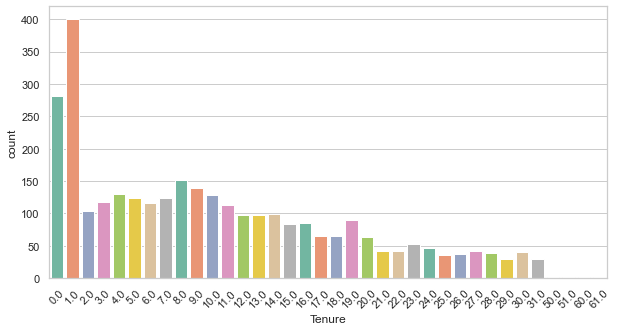

,n_Tenure
1.0,400
0.0,282
8.0,151
9.0,139
4.0,130
10.0,128
5.0,123
7.0,123
3.0,118
6.0,116


In [257]:
col_info(df, 0, (10,5))

TENURE

Feature tenure menjelaskan lama berlangganan customer (bulan) <br>
Feature tenure menunjukan anomali, yaitu terdapat nilai yang data yang sangat kecil (1) pada tenure diatas 31 bulan dan nilai ini akan di drop <br>
Dari data ini diketahui bahwa : <br>
total data customer : 3110 (terdapat missing value pada feature ini) <br>
cukup banyak pelanggan yang baru menggunakan ecommerce (tenure = 0 dan 1, mengindikasikan baru berlangganan 1 bulan) [9%,12,86%] <br>
Pelanggan yang sudah lama menggunakan ecommerce sedikit sekali (tenure diatas 31, mengindikasikan sudah berlangganan lebih dari 31 bulan) [0,12%] <br>
customer lainnya [80%] sudah berlangganan selama 2 bulan s.d 31 bulan.

**Kolom WarehouseToHome**

index kolom : 1
nama kolom : WarehouseToHome

Unique item pada kolom
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

Value Counts


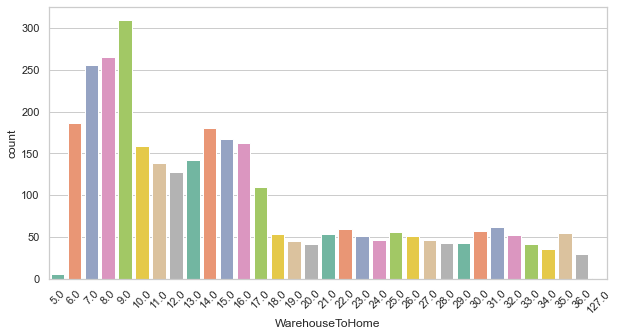

,n_WarehouseToHome
9.0,310
8.0,266
7.0,256
6.0,187
14.0,181
15.0,167
16.0,162
10.0,159
13.0,142
11.0,139


In [258]:
col_info(df, 1, (10,5))

Stats for WarehouseToHome:


count    3135.000000
mean       15.510367
std         8.568382
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

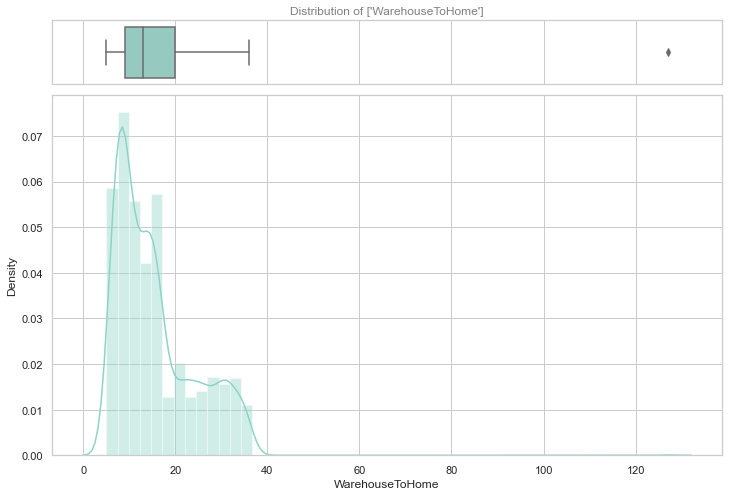

Skewness of WarehouseToHome: nan


In [259]:
visualize_distribution(df,1)

Warehouse To Home

Feature Warehouse To Home menjelaskan jarak dari warehouse ke rumah pembeli <br>
Feature Warehouse To Home menunjukan anomali yaitu terdapat 1 data outlier dan data ini akan dihapus <br>
Dari data ini diketahui bahwa : <br>
total data customer : 3135 <br>
Persebaran data menunjukkan tidak normal <br>
Median dari jarak warehouse ke rumah customer yaitu 13 <br>

Maka, akan dilakukan penghapusan pada 1 outlier ini, karena jumlah nya hanya 1.

**Kolom Number Of Device Registered**

index kolom : 2
nama kolom : NumberOfDeviceRegistered

Unique item pada kolom
[4 3 6 2 5 1]

Value Counts


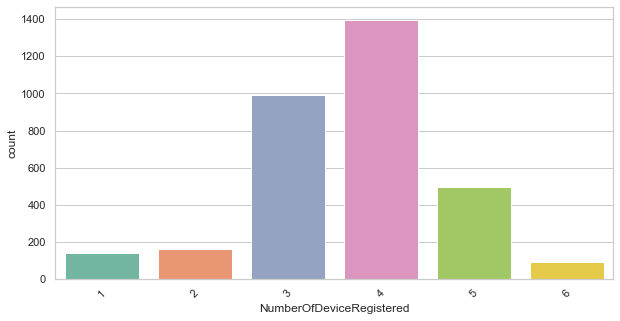

,n_NumberOfDeviceRegistered
4,1396
3,992
5,493
2,163
1,137
6,89


In [260]:
col_info(df, 2, (10,5))

Number Of Device Registered

Feature Number Of Device Registered menjelaskan jumlah device yang teregistrasi dari customer <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Jumlah device yang terdaftar paling banyak yaitu 6 device dan customer minimal memiliki 1 device yang terdaftar. <br>
Customer paling banyak memiliki 4 device yang terdaftar sebanyak 42,69%. <br>
Customer paling sedikit memiliki 6 device yang terdaftar sebanyak 2,72%. <br>

**Kolom Prefered Order Cat**

index kolom : 3
nama kolom : PreferedOrderCat

Unique item pada kolom
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Value Counts


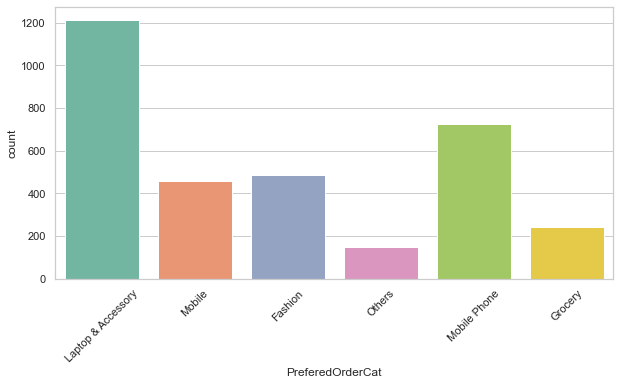

,n_PreferedOrderCat
Laptop & Accessory,1213
Mobile Phone,725
Fashion,484
Mobile,458
Grocery,241
Others,149


In [261]:
col_info(df, 3, (10,5))

Prefered Order Cat
 
Feature Prefered Order Cat menjelaskan jenis kategori yang paling banyak dibeli oleh customer <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Kategori yang paling banyak dibeli yaitu Laptop & Accessory sebanyak 37%. <br>
Kategori yang paling sedikit dibeli yaitu Others sebanyak 4,55%. <br>

**Kolom Satisfaction Score**

index kolom : 4
nama kolom : SatisfactionScore

Unique item pada kolom
[3 1 4 2 5]

Value Counts


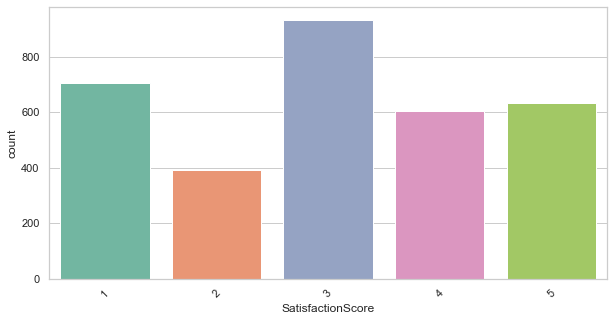

,n_SatisfactionScore
3,932
1,707
5,635
4,604
2,392


In [262]:
col_info(df, 4, (10,5))

Satisfaction Score
 
Feature Satisfaction Score menjelaskan tingkat kepuasan customer <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Saya menganggap bahwa nilai 1 yang diberikan yaitu sangat tidak puas, nilai 2 yaitu tidak puas, nilai 3 yaitu cukup puas, nilai 4 yaitu puas, nilai 5 yaitu sangat puas <br>
Customer paling banyak memberi nilai 3 yaitu cukup puas [28,50%] <br>
Tetapi customer yang memberi nilai 1 yaitu sangat tidak puas menurut saya sangat tinggi karena dibawah jumlah customer yang paling banyak memberi nilai 3 [21,62%]

**Kolom Marital Status**

index kolom : 5
nama kolom : MaritalStatus

Unique item pada kolom
['Single' 'Married' 'Divorced']

Value Counts


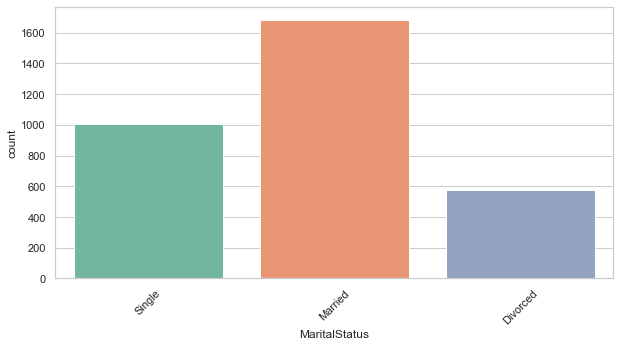

,n_MaritalStatus
Married,1686
Single,1008
Divorced,576


In [263]:
col_info(df, 5, (10,5))

Marital Status
 
Feature Marital Status menjelaskan status pernikahan customer <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Status Customer paling banyak yaitu status menikah [51,55%] <br>
Status Customer paling sedikit yaitu status bercerai [17,61%] <br>

**Kolom Number Of Address**

index kolom : 6
nama kolom : NumberOfAddress

Unique item pada kolom
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Value Counts


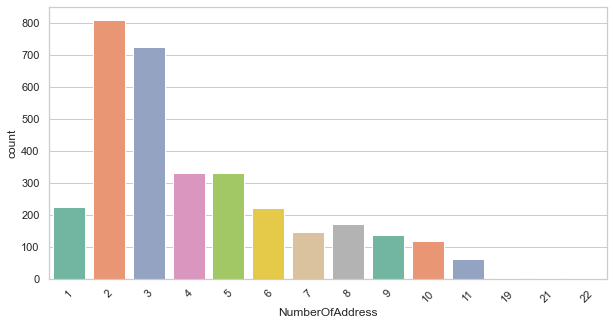

,n_NumberOfAddress
2,809
3,723
4,331
5,329
1,225
6,221
8,169
7,145
9,137
10,118


In [264]:
col_info(df, 6, (10,5))

Number Of Address
 
Feature Number Of Address menjelaskan Jumlah alamat dari customer <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Data anomali yaitu memiliki outlier diatas nilai 11, maka outlier akan di-drop <br>
Customer paling banyak hanya memiliki 2 alamat [27,74%] <br>
Customer paling sedikit memiliki alamat lebih dari 11 [0,09%] yang merupakan outlier.

**Kolom Complain**

index kolom : 7
nama kolom : Complain

Unique item pada kolom
[0 1]

Value Counts


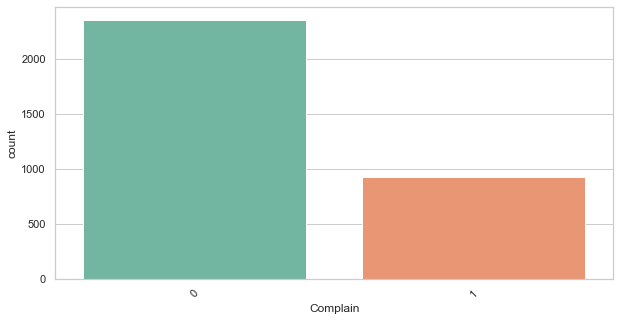

,n_Complain
0,2349
1,921


In [265]:
col_info(df, 7, (10,5))

Complain
 
Feature Complain menjelaskan apakah customer pernah complain atau tidak <br>
Dari data ini diketahui bahwa : <br>
Jumlah customer sebanyak 3270 <br>
Nilai 0 menunjukkan bahwa customer tidak pernah complain sedangkan nilai 1 menunjukkan bahwa customer pernah complain <br>
Customer yang tidak pernah complain lebih banyak dibanding customer yang pernah complain [71,83%].

**Kolom Day Since Last Order**

index kolom : 8
nama kolom : DaySinceLastOrder

Unique item pada kolom
[ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

Value Counts


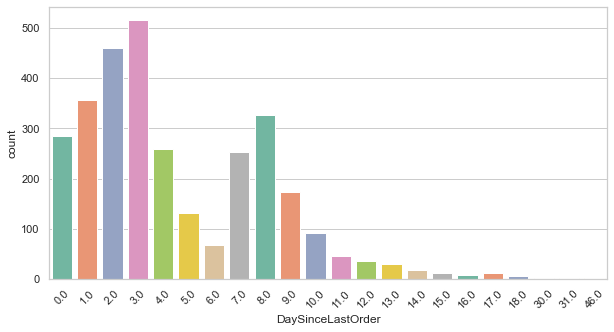

,n_DaySinceLastOrder
3.0,516
2.0,461
1.0,356
8.0,326
0.0,286
4.0,260
7.0,253
9.0,173
5.0,131
10.0,91


In [266]:
col_info(df, 8, (10,5))

Stats for DaySinceLastOrder:


count    3089.000000
mean        4.545484
std         3.696022
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

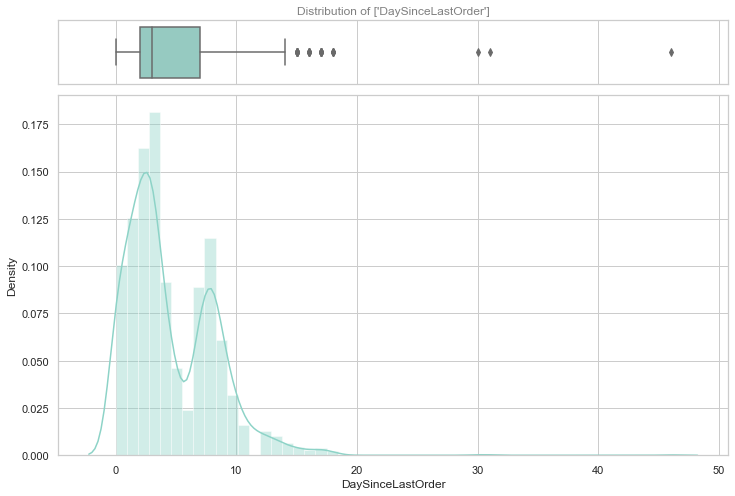

Skewness of DaySinceLastOrder: nan


In [267]:
visualize_distribution(df,8)

Day Since Last Order
 
Feature Day Since Last Order menjelaskan jumlah hari semenjak customer terakhir order <br>
Dari data ini diketahui bahwa : <br>
Data menunjukkan anomali yaitu terdapat outlier diatas nilai 18, maka data akan di drop.
Jumlah customer sebanyak 3089 dan terdapat nilai NaN<br>
Persebaran data menunjukkan data tidak normal, median dari data yaitu pada nilai 3 hari <br>
Customer paling banyak terakhir order pada 3 hari terakhir [16,7%]
Customer paling sedikit terakhir order lebih dari 18 hari terakhir [0,09%]

**Kolom Cashback Amount**

index kolom : 9
nama kolom : CashbackAmount

Unique item pada kolom
[143.32 129.29 168.54 ... 147.66 231.86 153.73]

Value Counts


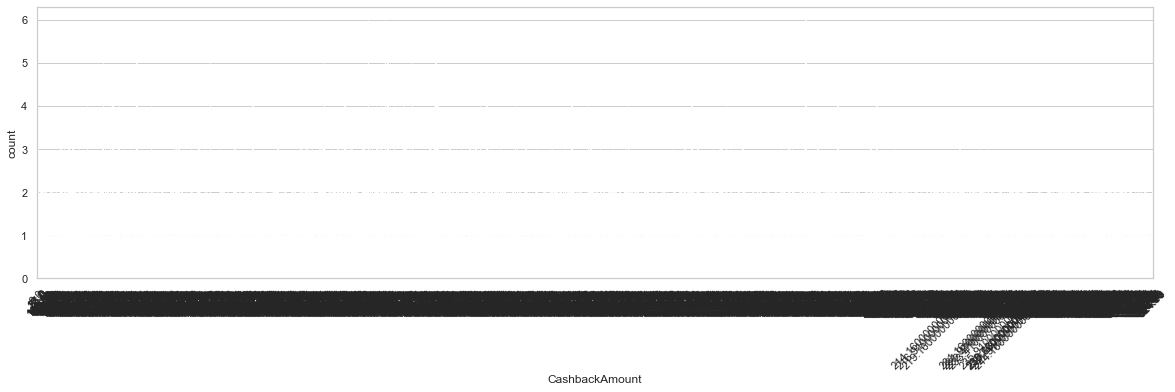

,n_CashbackAmount
149.36,6
148.42,6
188.47,6
123.42,5
146.27,5
...,...
168.81,1
129.74,1
168.23,1
154.86,1


In [268]:
col_info(df, 9, (20,5))

Terlalu banyak kolom numerikal, sehingga kita cari distribusi nya saja

Stats for CashbackAmount:


count    3270.000000
mean      177.417670
std        49.310647
min         0.000000
25%       145.892500
50%       163.885000
75%       197.137500
max       324.990000
Name: CashbackAmount, dtype: float64

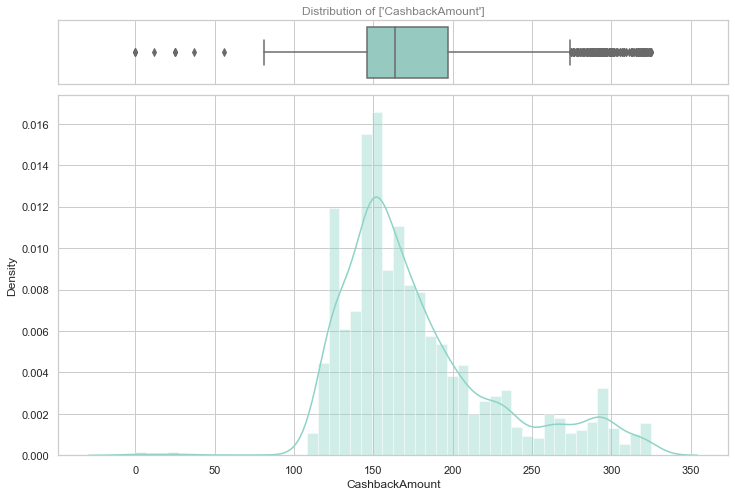

Skewness of CashbackAmount: 1.0877030787095776


In [269]:
visualize_distribution(df,9)

Cashback Amount
 
Feature Cashback Amount menjelaskan jumlah cashback <br>
Dari data ini diketahui bahwa : <br>
Data menunjukkan anomali yaitu terdapat outlier yang harus dicek dahulu nilai nya. <br>
Jumlah customer sebanyak 3270 <br>
Persebaran data menunjukkan data tidak normal, median dari data yaitu pada nilai cashback sebesar 163.8 <br>

**Kolom Churn**

index kolom : 10
nama kolom : Churn

Unique item pada kolom
[0 1]

Value Counts


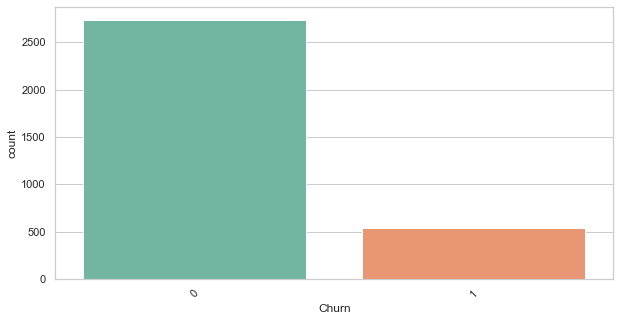

,n_Churn
0,2736
1,534


In [270]:
col_info(df, 10, (10,5))

Churn
 
Feature Churn menjelaskan jumlah cashback <br>
Dari data ini diketahui bahwa : <br>
Data churn ini merupakan target dari Machine learning yang akan dibuat. <br>
Jumlah customer sebanyak 3253 <br>
Nilai 0 menunjukkan customer tidak churn, sedangkan nilai 1 menunjukkan customer churn. <br>
Data menunjukkan imbalance karena jumlah customer yang churn sebanyak 83,61% sedangkan customer yang tidak churn sebanyak 16,38%

Setelah kita cek satu-satu feature, maka sekarang saya akan mengecek keseluruhan feature

**Mengecek Missing Value**

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3135 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3089 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 435.6+ KB


In [272]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Dapat dilihat diatas bahwa feature Tenure, WarehouseToHome, DaySinceLastOrder memiliki missing value, maka akan dicek terlebih dahulu, apakah missing value antara ketiga feature ini saling berkaitan atau tidak melalui heatmap.

<AxesSubplot:>

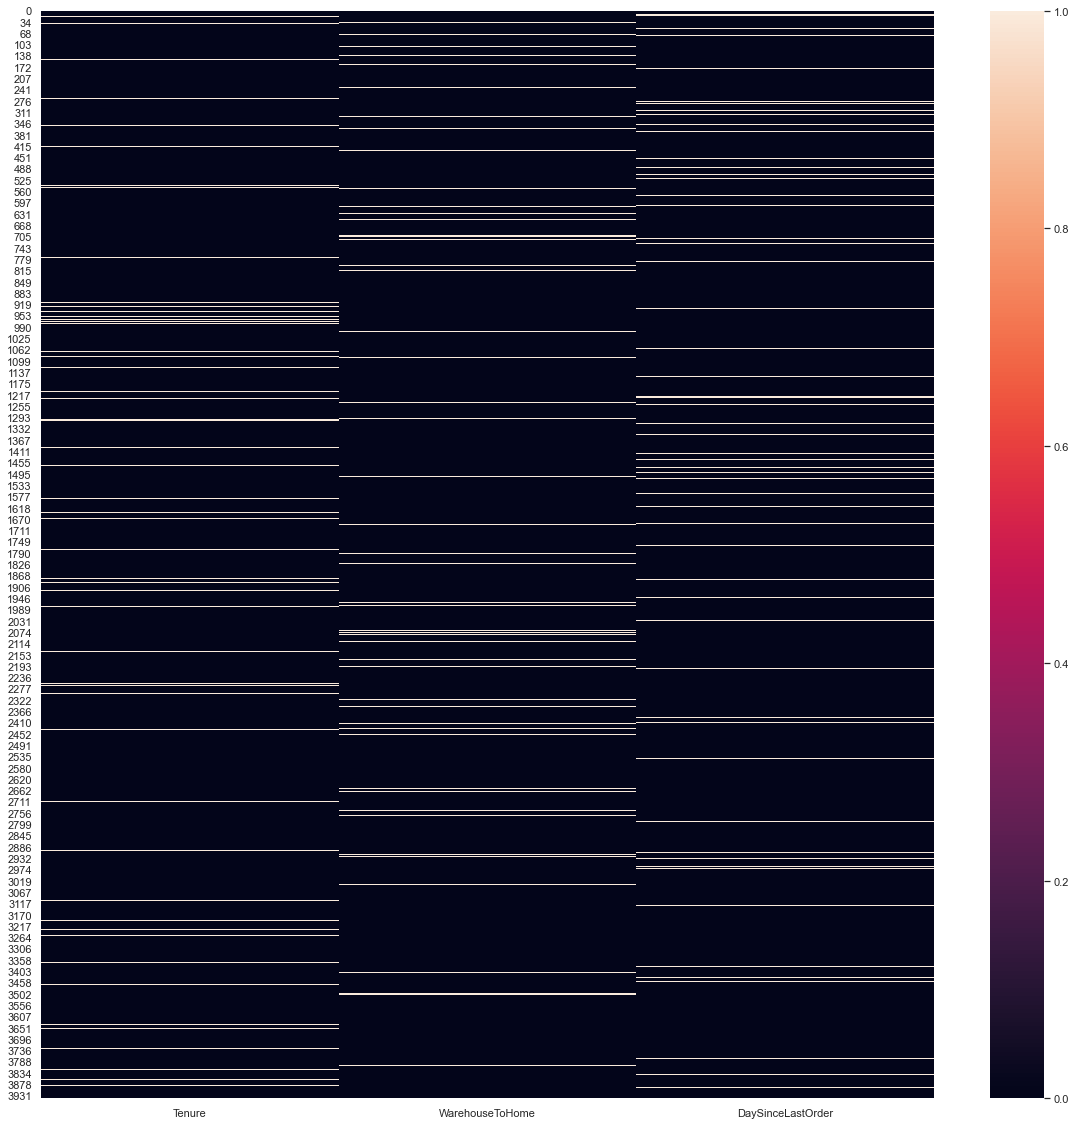

In [273]:
plt.figure(figsize = (20,20))
sns.heatmap(df[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna())

Karena dari ketiga kolom yang memiliki missing value ini terlihat tidak saling berkaitan maka diputuskan akan menggunakan simple imputer nantinya untuk mengisi missing value ini dan ketiga feature ini merupakan feature numerikal. Saya akan cek terlebih dahulu distribusi ketiga feature ini dengan melihat grafiknya.

Text(0, 0.5, 'n_customer')

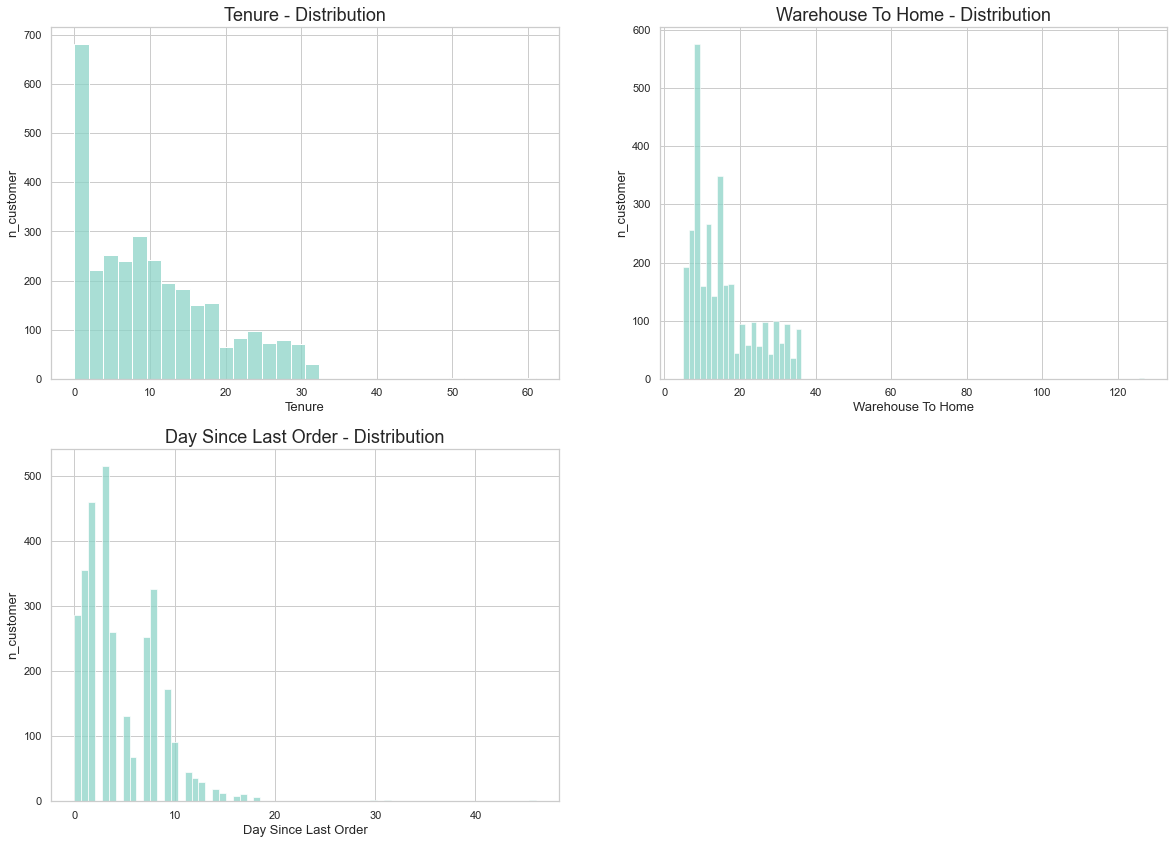

In [274]:
plt.figure(figsize=(20,22))
plt.subplot(321)
sns.histplot(data=df, x='Tenure')
plt.title("Tenure - Distribution", fontsize = 18)
plt.xlabel("Tenure",size = 13)
plt.ylabel("n_customer",size = 13)
plt.subplot(322)
sns.histplot(data=df, x='WarehouseToHome')
plt.title("Warehouse To Home - Distribution", fontsize = 18)
plt.xlabel("Warehouse To Home",size = 13)
plt.ylabel("n_customer",size = 13)
plt.subplot(323)
sns.histplot(data=df, x='DaySinceLastOrder')
plt.title("Day Since Last Order - Distribution", fontsize = 18)
plt.xlabel("Day Since Last Order",size = 13)
plt.ylabel("n_customer",size = 13)

Dapat dilihat dari grafik diatas, ketiga feature ini terdistribusi tidak normal. Maka saya akan menginput Missing Value menggunakan mediannya. Inpute missing value dapat dilakukan pada modeling machine learning, tetapi saya akan menginpute missing value sekarang agar saya bisa melakukan analisis data lebih lanjut.

In [275]:
# Mengisi missing value dengan median
df['Tenure']= df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome']= df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder']= df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [276]:
# Pengecekan kembali missing value
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Dapat kita lihat bahwa sudah tidak ada lagi missing value

**Mengecek Outlier**
<br>

Pada pengecekan setiap feature diatas, kita sudah bisa mendeteksi adanya beberapa kolom yang memiliki outlier karena nilai nya sangat kecil. Maka, kita cek menggunakan boxplot.

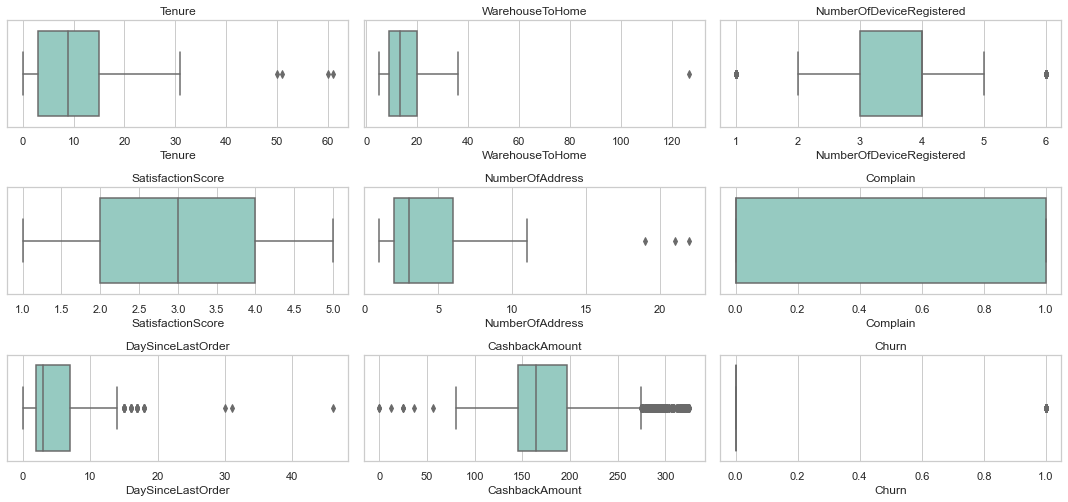

In [277]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [278]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [279]:
# data di luar rentang di bawah ini adalah outlier, maka akan didrop

for i in list(df.describe()):
    print(i)
    outliers(df[i])

Tenure
Upper fence:  33.0
Lower fence:  -15.0
WarehouseToHome
Upper fence:  36.5
Lower fence:  -7.5
NumberOfDeviceRegistered
Upper fence:  5.5
Lower fence:  1.5
SatisfactionScore
Upper fence:  7.0
Lower fence:  -1.0
NumberOfAddress
Upper fence:  12.0
Lower fence:  -4.0
Complain
Upper fence:  2.5
Lower fence:  -1.5
DaySinceLastOrder
Upper fence:  14.5
Lower fence:  -5.5
CashbackAmount
Upper fence:  274.005
Lower fence:  69.02499999999998
Churn
Upper fence:  0.0
Lower fence:  0.0


In [280]:
# df[df['Tenure']>33].shape
# df[df['WarehouseToHome']>36.5].shape
# df[df['NumberOfAddress']>12].shape
# df[df['DaySinceLastOrder']>18].shape
# df[df['CashbackAmount']<69].shape
# Saya mengecek satu-satu data outlier, disini saya tidak menghapus semua data outlier tetapi memilih data outlier yang data nya tidak terlalu banyak agar data tidak terbuang banyak

In [281]:
# Buang outliers per kolom satu per satu 

df = df[df['Tenure']<=33]
print(df.shape)

df = df[df['WarehouseToHome']<=36.5]
print(df.shape)

df = df[df['NumberOfAddress']<=12]
print(df.shape)

df = df[df['DaySinceLastOrder']<=18]
print(df.shape)

df = df[df['CashbackAmount']>=69]
print(df.shape)

(3266, 11)
(3265, 11)
(3262, 11)
(3259, 11)
(3250, 11)


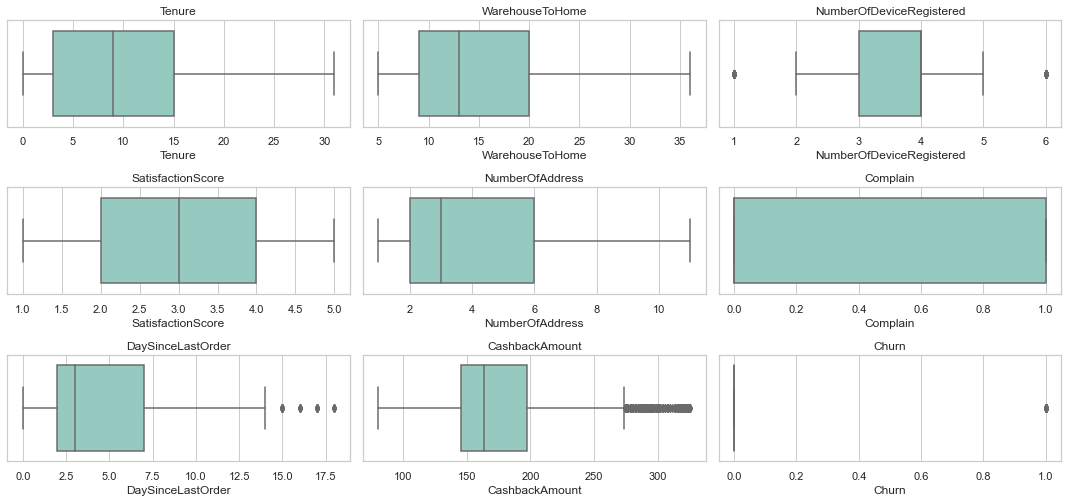

In [282]:
# Saya lakukan pengecekan ulang terhadap outlier
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Dapat dilihat, bahwa pada feature Warehouse to home, Number of device, Day since last order, cashback amount masih memiliki nilai outlier tetapi tidak saya hapus dikarenakan menurut saya data outlier ini cukup banyak dan saya tidak ingin kehilangan banyak data.

In [283]:
# Data yang sudah bersih
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3250 non-null   float64
 1   WarehouseToHome           3250 non-null   float64
 2   NumberOfDeviceRegistered  3250 non-null   int64  
 3   PreferedOrderCat          3250 non-null   object 
 4   SatisfactionScore         3250 non-null   int64  
 5   MaritalStatus             3250 non-null   object 
 6   NumberOfAddress           3250 non-null   int64  
 7   Complain                  3250 non-null   int64  
 8   DaySinceLastOrder         3250 non-null   float64
 9   CashbackAmount            3250 non-null   float64
 10  Churn                     3250 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 304.7+ KB


# 3.2 Feature Correlation

Pada bagian ini saya akan bagi menjadi kolom numerikal dan kategorikal

In [284]:
numerical_f = ["Tenure", "WarehouseToHome", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "Complain", "DaySinceLastOrder", "CashbackAmount"]
categorical_f = ["PreferedOrderCat", "MaritalStatus"]
target = ["Churn"]

## 3.2.1. NUMERICAL FEATURE WITH TARGET

Sebelum masuk ke langkah selanjutnya, saya ingin mengecek dulu normalitas data dari numerical feature yang ada

In [285]:
numerical_f

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [286]:
# pengujian distribusi normal dengan metode grafis & frequentist
ks_p_value_comp = []
shapiro_comp = []
feature_comp = []
category = numerical_f # yang akan diuji normalitasnya hanya numerical feature saja

for num_feat in category :   
    # feature compilation
    feature_comp.append(num_feat)
    
    # uji statistik dengan kolmogorofsmirnov
    ks_statistic, ks_pvalue = kstest(df[num_feat], "norm")
    # hasilnya pengujian KS disimpan pada sebuah list yang kita buat sebelumnya
    ks_p_value_comp.append(ks_pvalue)
    
    # uji statistik dengan shapirowilk
    sw_statistic, sw_pvalue = shapiro(df[num_feat])
    # hasilnya pengujian shapiro wilk disimpan pada sebuah list yang kita buat sebelumnya
    shapiro_comp.append(sw_pvalue)

# hasil pengujian statistik dikompilasi ke dalam suatu dataframe
pd.DataFrame({
    "ks_test_pval" : ks_p_value_comp,
    "shapiro_test_pval" : shapiro_comp},
    index = feature_comp)

,ks_test_pval,shapiro_test_pval
Tenure,0.0,4.314723e-38
WarehouseToHome,0.0,1.401298e-44
NumberOfDeviceRegistered,0.0,1.615697e-42
SatisfactionScore,0.0,9.668959e-44
NumberOfAddress,0.0,8.407791e-45
Complain,0.0,0.000000e+00
DaySinceLastOrder,0.0,7.016442e-41
CashbackAmount,0.0,1.121039e-44


*NORMALITY CHECK* <br>
Berdasarkan pemeriksaan normalitas yang dilakukan dengan metode frequentist diatas (Kolmogorof Smirnof & Shapiro Wilk Test), nilai pvalue - nya tidak ada yang lebih besar dari 0.05 maka untuk feature numerikal diatas tidak terdistribusi normal. Maka metode korelasi yang digunakan adalah metode Spearman

**HEATMAP**

Kuat korelasi antar feature numerical dengan target Churn diberikan dibawah ini

In [287]:
# calculate correlation using spearman
numeric_corr = df[numerical_f + target].corr(method = "spearman")
numeric_corr

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.054464,-0.031793,-0.030389,0.273308,-0.041107,0.172237,0.397455,-0.387167
WarehouseToHome,-0.054464,1.000000,0.012764,0.021638,0.021865,0.052521,0.028896,0.022181,0.073859
NumberOfDeviceRegistered,-0.031793,0.012764,1.000000,-0.006245,0.125078,0.007113,0.034837,0.198416,0.105180
SatisfactionScore,-0.030389,0.021638,-0.006245,1.000000,0.039944,-0.030503,0.026932,0.000532,0.098297
NumberOfAddress,0.273308,0.021865,0.125078,0.039944,1.000000,0.004135,-0.082163,0.258276,0.031734
Complain,-0.041107,0.052521,0.007113,-0.030503,0.004135,1.000000,-0.043251,0.002308,0.262975
DaySinceLastOrder,0.172237,0.028896,0.034837,0.026932,-0.082163,-0.043251,1.000000,0.348134,-0.168878
CashbackAmount,0.397455,0.022181,0.198416,0.000532,0.258276,0.002308,0.348134,1.000000,-0.173601
Churn,-0.387167,0.073859,0.105180,0.098297,0.031734,0.262975,-0.168878,-0.173601,1.000000


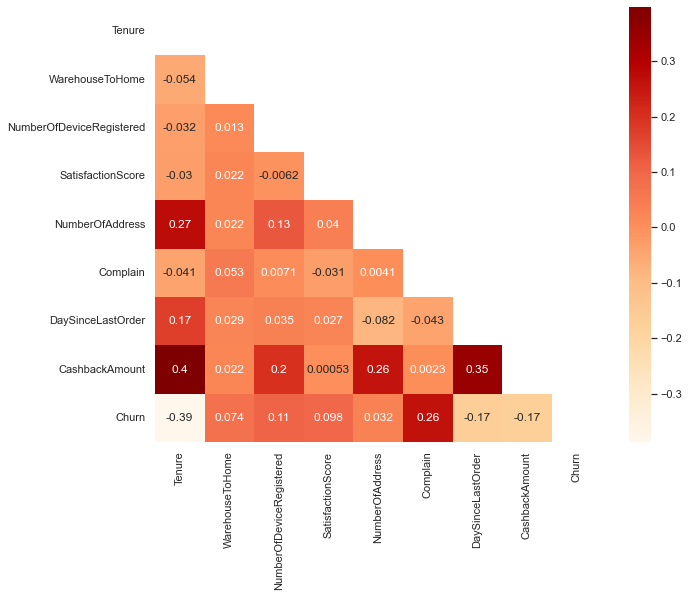

In [288]:
# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(numeric_corr))

# membuat heatmap
plt.figure(figsize = (10,8))
sns.heatmap(numeric_corr, cmap="OrRd", annot = True, mask=mask)
plt.show()

*INSIGHT ABOUT CORRELATION*

Dari heatmap diatas dapat ditarik kesimpulan bahwa:
- Nilai positif menandakan korelasi positif dan kebalikannya
- Dengan churn sebagai target maka dilihat hubungan semua feature numerikal terhadap target
- Nilai korelasi yang paling tinggi yaitu churn dan tenure, tetapi nilai korelasi menunjukkan negatif [-0.38] yang berarti bahwa semakin tinggi nilai tenure (semakin lama menggunakan ecommerce) maka semakin rendah kemungkinan untuk churn. Tapi kuat korelasi antara tenure dan churn terbilang sedang (range 0.3 - 0.7)
- Nilai korelasi yang cukup tinggi selanjutnya yaitu churn dan complain sebesar dengan nilai positif [0.26]. Hal ini menunjukkan jika semakin tinggi complain, semakin tinggi kemungkinan untuk churn. Tapi kuat korelasi antara churn dan complain terbilang terbilang lemah (range 0.0 - 0.3).

## 3.2.2. CATEGORICAL FEATURE WITH TARGET

ada 2 categorical features : ['PreferedOrderCat', 'MaritalStatus']
target variables : Churn 



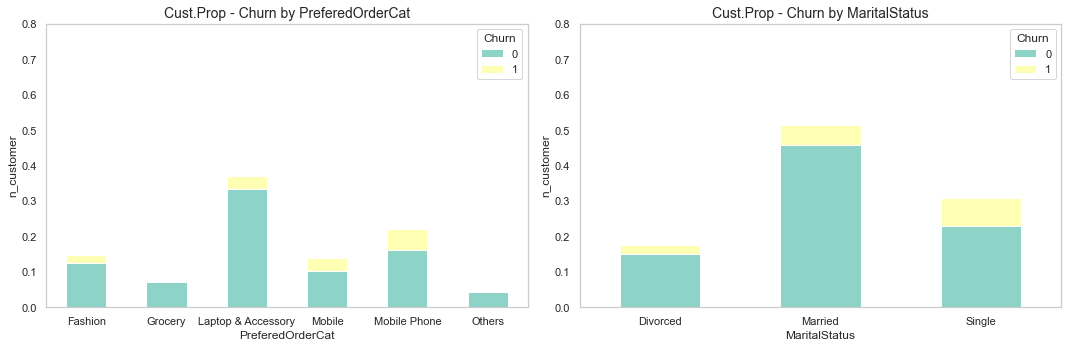

In [289]:
target_n_dependant_categorical_proportion(df, categorical_f, "Churn", 2, 1, figsize = (15,5))

In [290]:
# displaying column side by side
def display_side_by_side(*args,titles=cycle([""])):
    html_str = ""
    for df,title in zip(args, chain(titles,cycle(["</br>"])) ):
        html_str += "<th style='text-align:center'><td style = 'vertical-align:top'>"
        html_str += f"<h3>{title}</h3>"
        html_str += df.to_html().replace("table","table style='display:inline'")
        html_str += "</td></th>"
    display_html(html_str,raw=True)

In [291]:
list_ct = []
for cat_feat in categorical_f:
    ct_df = pd.crosstab(df[cat_feat], df["Churn"], normalize = True).round(5)*100
    list_ct.append(ct_df)

churnby_cat, churnby_marital = list_ct

display_side_by_side(churnby_cat, churnby_marital, titles = ["Churn by Prefered Order Cat", "Churn by Marital Status"])

Churn,0,1
PreferedOrderCat,,
Fashion,12.585,2.277
Grocery,7.046,0.308
Laptop & Accessory,33.354,3.662
Mobile,10.246,3.785
Mobile Phone,16.154,6.000
Others,4.246,0.338
Churn,0,1
MaritalStatus,,
Divorced,14.923,2.738


*INSIGHT ABOUT THE CATEGORICAL FEATURES*

Dari grafik yang diberikan diatas, saya mencoba melihat beberapa perspektif dari feature yang ada bila dihubungkan dengan targetnya yaitu churn. Dari beberapa perspektif ini, diharapkan nanti kita bisa mengetahui faktor apa yang sebenarnya yang mempengaruhi customer untuk churn

*Prefered Order Category*

- Dari grafik prefered order category diatas kategori yang paling tinggi yang dipilih beli customer adalah laptop & accessory sekitar 35% tetapi churn rate nya rendah sebesar 0.09%.
- Kategori dengan churn rate yang tinggi ada pada kategori Mobile Phone sekitar 0.3%

*Marital Status*

- Dari grafik Marital Status diatas kategori yang paling banyak berstatus Married/menikah sekitar 50% dengan churn rate 0.11%
- Tetapi status yang paling banyak melakukan churn rate adalah customer dengan status single dengan churn rate sebesar 0.3%

## 3.2.3. CORRELATION ALL FEATURE

- Pada bagian sebelumnya kita telah mengamati numerical & categorical feature secara parsial.
- Untuk categorical feature akan saya ubah menjadi format numerical agar dapat kita lihat korelasinya. Untuk melakukan itu saya akan menggunakan ColumnTransformer dan OneHotEncoder
jumlah categorical value pada tiap feature masih relevan untuk di One Hot Encoder (jumlah value kategori tidak terlalu banyak)
- setelahnya kita akan melihat korelasi antar feature dengan menggunakan heatmap untuk memperkuat analisa yang telah dilakukan sebelumnya dan mungkin ada hal - hal yang luput dari pengamatan sebelumnya

In [292]:
# untunk masuk bagian ini membutuhkan library ColumnTransformer dan OneHotEncoder

# membuat transformer untuk preprocess data dummy
dummy_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat','MaritalStatus'])
    ], remainder = "passthrough")

# melakukan transformasi data df. simpan dalam variabel baru df_dummies
df_dummies = dummy_transformer.fit_transform(df)

# df_dummies baru berupa array. belum dalam bentuk dataframe

In [293]:
# melihat nama fitur yang digenerate oleh onehot encoder
dummy_feature_name = dummy_transformer.get_feature_names()
dummy_feature_name

['onehot__x0_Grocery',
 'onehot__x0_Laptop & Accessory',
 'onehot__x0_Mobile',
 'onehot__x0_Mobile Phone',
 'onehot__x0_Others',
 'onehot__x1_Married',
 'onehot__x1_Single',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Churn']

In [294]:
# membuat dataframe hasil transform
df_dummies = pd.DataFrame(df_dummies, columns = dummy_feature_name)
df_dummies.head(5)

,onehot__x0_Grocery,onehot__x0_Laptop & Accessory,onehot__x0_Mobile,onehot__x0_Mobile Phone,onehot__x0_Others,onehot__x1_Married,onehot__x1_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,25.0,4.0,3.0,7.0,0.0,3.0,230.27,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0


Untuk kemudahan, saya asumsikan bahwa data tidak terdistribusi normal untuk perhitungan korelasi. sehingga metode korelasi yang digunakan adalah spearman

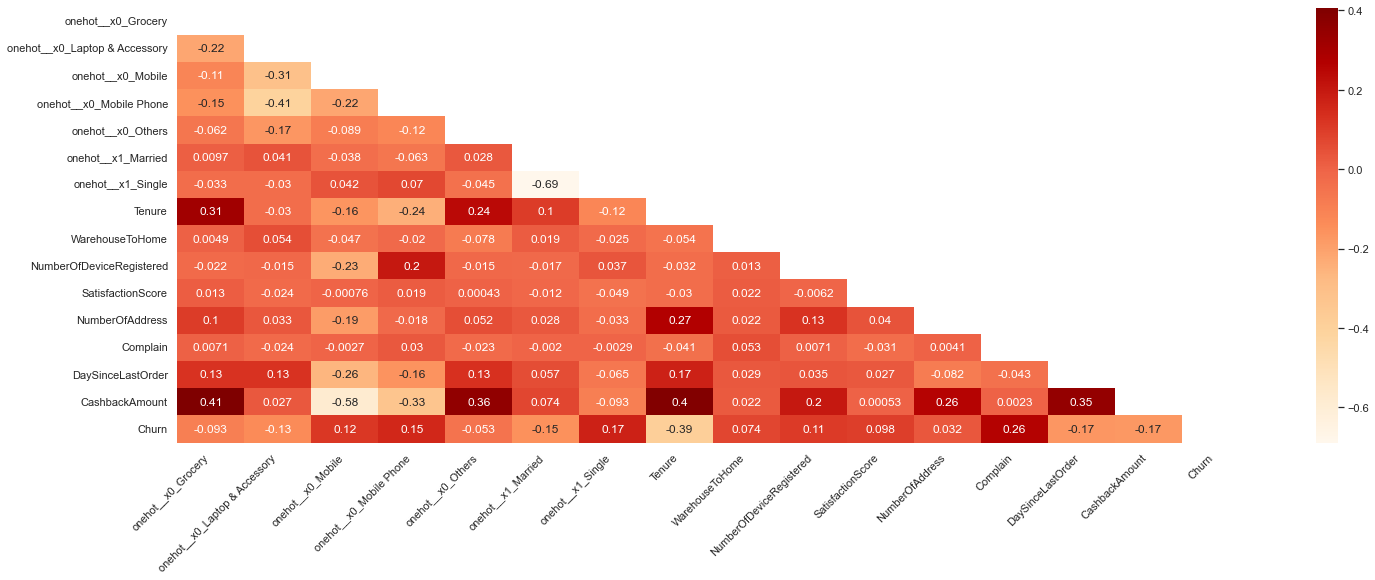

In [295]:
# calculate correlation using spearman
dummies_corr = df_dummies.corr(method = "spearman")

# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(dummies_corr))

# membuat heatmap
plt.figure(figsize = (24,8))
sns.heatmap(dummies_corr, cmap="OrRd", annot = True, mask = mask)
plt.xticks(rotation = 45, ha = "right")
plt.show()

Dari semua korelasi semua feature diatas, saya simpulkan:
- Kolom cahsback amount paling banyak berkorelasi cukup kuat dengan kolom lainnya
- Untuk korelasi terhadap target kita (churn), yang paling berkorelasi selain kolom tenure dan complain yang telah dijelaskan sebelumnya yaitu kolom Single, Mobile phone, dan mobile yang telah di one hot encoding
- Semua kolom akan saya gunakan walaupun ada beberapa kolom yang sangat kecil korelasinya dengan target dikarenakan jumlah kolom (feature) cukup sedikit menurut saya agar menghindari underfitting.

# 4. MACHINE LEARNING

## 4.1. DATA PREPARATION

**Define X and y**

In [296]:
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

**Data Splitting**

In [297]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

**Preprocessing**

Encode:
- One Hot Encoder:
    - PreferedOrderCat
    - MaritalStatus

In [298]:
# untuk masuk bagian ini membutuhkan library ColumnTransformer dan OneHotEncoder

# membuat transformer untuk preprocess data dummy
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat','MaritalStatus'])
    ], remainder = "passthrough")


## 4.2. BASE MODEL EVALUATION

- Pada bagian ini akan didefinisikan model model yang akan digunakan.
- Model model tersebut masih menggunakan default parameter
- Kita akan melihat hasil base model berdasarkan cross validasi dan test data

*MENDEFINSIKAN MODEL YANG AKAN DIGUNAKAN*

In [299]:
# Baseline model, default model
base_m_logreg = LogisticRegression(random_state = 0)
base_m_knn = KNeighborsClassifier()
base_m_dt = DecisionTreeClassifier(random_state = 0)

# boosting
# random forest
base_m_rf = RandomForestClassifier(random_state = 0)

# Adaboost
tree_ada_base = DecisionTreeClassifier(random_state = 0)
base_m_tree_ada = AdaBoostClassifier(tree_ada_base, random_state = 0)

# GradientBoost
base_m_gbc = GradientBoostingClassifier(random_state = 0)

# XGBoost
base_m_xgb = XGBClassifier(random_state = 0)

# berikut beberapa penamaan yang disiapkan untuk digunakan pada bagian selanjutnya.

# compile basic model yang sudah dibuat dalam sebuah list
base_m_compile = [base_m_logreg, base_m_knn, base_m_dt, base_m_rf, base_m_tree_ada, base_m_gbc, base_m_xgb]

# nama classfier yang disimpan secara berurutan
model_name = ["Logreg", "KNN", "DT", "RF", "AB", "GB", "XGB"]

# base model
base_m_name = ["base_m_logreg", "base_m_knn", "base_m_dt", "base_m_rf", "base_m_tree_ada", "base_m_gbc", "base_m_xgb"]

# base model + oversampling
base_m_oversamp_name = ["oversamp_base_m_logreg", "oversamp_base_m_knn", "oversamp_base_m_dt", "oversamp_base_m_rf", 
                        "oversamp_base_m_tree_ada", "oversamp_base_m_gbc", "oversamp_base_m_xgb"]

# base model + undersampling 
base_m_undersamp_name = ["undersamp_base_m_logreg", "undersamp_base_m_knn", "undersamp_base_m_dt", "undersamp_base_m_rf", "undersamp_base_m_tree_ada",
                         "undersamp_base_m_gbc", "undersamp_base_m_xgb"]

*BENCHMARKING MODEL MENGGUNAKAN CROSS VALIDASI*

In [300]:
# mendefinsikan metode cross validasi yang akan digunakan
# metode cross validasi ini akan digunakan berkali kali pada bagian selanjutnya. jadi tidak didefinisikan ulang.
skfold = StratifiedKFold(n_splits = 5)

# buat list untuk menampung hasil cross validasi base model 
cv_base_model_best_score = []

# penamaan yang disiapkan untuk memberi nama kolom pada dataframe
cv_col_metrics_ = ["base_cv.recall.mean", "base_cv.recall.std",
                "base_cv.precision.mean", "base_cv.precision.std",
                "base_cv.acc.mean", "base_cv.acc.std"]

# kita gunakan forloop untuk menghitung melakukan cross validasi
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi, urutan value yang dikeluarkan, recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    # disini saya menggunakan cross validate agar dapat mengeluarkan beberapa metric sekaligus
    base_model_cv = cross_validate(model_pipe, X_train, y_train, cv = skfold, scoring = ["accuracy", "recall", "precision"], n_jobs = -1)
    
    # cross validasi disipan dalam list yang telah disiapkan sebelumnya
    cv_base_model_best_score.append([base_model_cv["test_recall"].mean(), base_model_cv["test_recall"].std(),
                             base_model_cv["test_precision"].mean(), base_model_cv["test_precision"].std(),
                             base_model_cv["test_accuracy"].mean(), base_model_cv["test_accuracy"].std()])

# membuat dataframe rekap hasil base model
df_base_m_cv_score = (pd.DataFrame(cv_base_model_best_score, columns = cv_col_metrics_, index = base_m_name) * 100).round(5)

# print output dengan format yang baik
display_side_by_side(df_base_m_cv_score, titles = ["Basic Model | Cross Validation Result"])

,base_cv.recall.mean,base_cv.recall.std,base_cv.precision.mean,base_cv.precision.std,base_cv.acc.mean,base_cv.acc.std
base_m_logreg,45.03146,9.60837,68.14297,3.26399,87.61538,1.24392
base_m_knn,32.84542,4.89148,56.31730,1.23490,84.80769,0.21066
base_m_dt,65.72367,3.55544,62.35470,2.44884,87.88462,0.88545
base_m_rf,56.78249,5.96681,79.25766,1.17053,90.50000,0.83913
base_m_tree_ada,67.59781,5.33395,63.23850,2.62171,88.26923,1.03917
base_m_gbc,57.01505,6.02892,78.97206,2.53721,90.46154,0.78446
base_m_xgb,68.51710,7.30371,77.49650,2.19326,91.53846,0.58330


*BENCHMARKING MODEL MENGGUNAKAN DATA TEST*

In [301]:
# buat list untuk menampung hasil test base model
base_model_test_score = []

# menyiapkan nama kolom untuk dataframe output hasil test
test_col_metrics_ = ["base_test_recall", "base_test_precision", "base_test_acc"]


# kita gunakan forloop untuk menghitung melakukan predict hasil test
# beberapa variabel telah disiapkan sebelumnya seperti base_m_name dan base_m_compile
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe.fit(X_train, y_train)
    
    # predict class & proba
    # predict proba yang dilakukan adalah ke kelas 1. 
    y_pred_proba_ = model_pipe.predict_proba(X_test)[:,1]
    
    # predict class
    y_pred_class_ = model_pipe.predict(X_test)
    
    # hasil scoring disimpan dalam sebuah list
    base_model_test_score.append([recall_score(y_test, y_pred_class_), # recall menggunakan Y_pred_class
                                      precision_score(y_test, y_pred_class_), # precision menggunakan Y_pred_class
                                      accuracy_score(y_test, y_pred_class_)]) # acc menggunakan Y_pred_class
    
    # mengeluarkan classification report default untuk melihat keseluruhan hasil yang ada
    print("--"*32)
    print(f"{modelname}")
    print("--"*32)    
    print(classification_report(y_test, y_pred_class_), "\n\n")

# hasil scoring dibuat dalam bentuk dataframe
df_base_m_test_score = (pd.DataFrame(base_model_test_score, index = base_m_name, columns = test_col_metrics_) * 100).round(5)

# print output dataframe dengan format yang baik
display_side_by_side(df_base_m_test_score, titles = ["Basic Model | Test Result"])

----------------------------------------------------------------
base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       544
           1       0.81      0.52      0.63       106

    accuracy                           0.90       650
   macro avg       0.86      0.75      0.79       650
weighted avg       0.90      0.90      0.89       650
 


----------------------------------------------------------------
base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       544
           1       0.55      0.39      0.45       106

    accuracy                           0.85       650
   macro avg       0.72      0.66      0.68       650
weighted avg       0.83      0.85      0.84       650
 


-------------------------------------------------------

,base_test_recall,base_test_precision,base_test_acc
base_m_logreg,51.88679,80.88235,90.15385
base_m_knn,38.67925,54.66667,84.76923
base_m_dt,63.20755,65.68627,88.61538
base_m_rf,57.54717,80.26316,90.76923
base_m_tree_ada,64.15094,64.15094,88.30769
base_m_gbc,63.20755,79.76190,91.38462
base_m_xgb,71.69811,85.39326,93.38462


## 4.3. BASE MODEL WITH OVERSAMPLING

- Kurang lebih sama dengan yang akan dilakukan pada 4.2, tapi pada bagian ini ada 1 proses tambahan pada pipeline yaitu penambahan step Oversampling.
- Pipeline yang digunakan sudah merupakan package dari imblearn sehingga proses fit.resample dan fit_transform bisa dilakukan secara sekuensial.
- Untuk metode oversampling yang digunakan adalah SMOTENC karena dilihat dari data yang kita miliki, kita memiliki fitur kategorikal dan numerikal.
- Secara umum kita akan menggunakan step yang telah diberikan pada bagian ini, tapi perlu menambahkan step oversampling

Base model yang telah didefinsikan dapat dilihat disini:

BENCHMARKING MODEL + OVERSAMPLING MENGGUNAKAN CROSS VALIDAS

In [302]:
X_train.head(1)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3032,1.0,11.0,5,Laptop & Accessory,2,Single,3,1,4.0,169.87


In [303]:
# Sebelum mendefinsikan metode oversamplingnya yaitu SMOTENC
# SMOTENC untuk parameter categorical feature. inputnya adalah index kolom kategorikal, jadi disini saya state terlebih dahulu index kategorikal kolommnya
# yang diinput adalah indexnya, jadi melihat kolom diatas, kita tau mana saja index kolom dengan data kategorikal
cat_col_index = [3, 5]

# baru definsikan metode resamplingnya
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 0)

# list untuk menyimpan score model hasil oversampling
cv_base_model_oversampling_best_score = []

# penamaan saja untuk pembuatan dataframe nantin
cv_col_metrics_ = ["ovrsm_cv.recall.mean", "ovrsm_cv.recall.std",
                "ovrsm_cv.precision.mean", "ovrsm_cv.precision.std",
                "ovrsm_cv.acc.mean", "ovrsm_cv.acc.std"]

# dengan forloop, menghitung score model yang telah dioversampling.
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel, pipe sudah menggunakan imblearn. 
    # jadi bisa input bersamaan proses resamplingnya.
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi
    # urutan value yang dikeluarkan
    # recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    oversamp_base_model_cv = cross_validate(model_pipe_oversamp, X_train, y_train, cv = skfold, scoring = ["accuracy", "recall", "precision"], n_jobs = -1)
    cv_base_model_oversampling_best_score.append([oversamp_base_model_cv["test_recall"].mean(), oversamp_base_model_cv["test_recall"].std(),
                             oversamp_base_model_cv["test_precision"].mean(), oversamp_base_model_cv["test_precision"].std(),
                             oversamp_base_model_cv["test_accuracy"].mean(), oversamp_base_model_cv["test_accuracy"].std()])

# membuat dataframe dari hasil yang ada
df_base_m_oversampling_cv_score = (pd.DataFrame(cv_base_model_oversampling_best_score, columns = cv_col_metrics_, index = base_m_oversamp_name) * 100).round(5)

# Output dataframe
display_side_by_side(df_base_m_oversampling_cv_score, titles = ["Basic Model - Oversampling(SMOTENC) | Cross Validation Result"])

,ovrsm_cv.recall.mean,ovrsm_cv.recall.std,ovrsm_cv.precision.mean,ovrsm_cv.precision.std,ovrsm_cv.acc.mean,ovrsm_cv.acc.std
oversamp_base_m_logreg,77.43092,7.49240,37.98387,1.92920,75.57692,1.45444
oversamp_base_m_knn,71.35157,3.19637,36.50086,1.49565,74.96154,0.98359
oversamp_base_m_dt,66.66484,1.93638,52.45023,3.64637,84.53846,1.52203
oversamp_base_m_rf,72.99042,3.72509,65.69516,3.58063,89.26923,0.93739
oversamp_base_m_tree_ada,66.19699,2.02107,51.89666,1.75691,84.38462,0.81043
oversamp_base_m_gbc,71.34610,4.26217,56.36812,3.13234,86.15385,1.03203
oversamp_base_m_xgb,71.81395,5.58165,71.11608,4.76235,90.50000,1.10539


*BENCHMARKING MODEL + OVERSAMPLING MENGGUNAKAN DATA TEST*

In [304]:
# membuat list kosong untuk menampung hasil test base model oversampling dengan data test
base_model_oversmp_test_score = []

# membuat list berisikan nama kolom untuk dataframe untuk rekap hasil nanti
test_col_metrics_ = ["ovrsm_test_recall", "ovrsm_test_precision", "ovrsm_test_acc"]

# training model dilakukan dengan bantuan forloop
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe_oversamp = Pipeline([
        ("oversampling", smote_nc),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe_oversamp.fit(X_train, y_train)
    
    # predict class & proba untuk model oversampling
    y_pred_oversm_proba_ = model_pipe_oversamp.predict_proba(X_test)[:,1]
    y_pred_oversm_class_ = model_pipe_oversamp.predict(X_test)
    
    # scoring
    base_model_oversmp_test_score.append([recall_score(y_test, y_pred_oversm_class_), # recall menggunakan y_pred_class
                                      precision_score(y_test, y_pred_oversm_class_), # precision menggunakan y_pred_class
                                      accuracy_score(y_test, y_pred_oversm_class_)]) # acc menggunakan Y_pred_class
    
    # classification report tiap classifiernya
    print("--"*32)
    print(f"SMOTENC {modelname}")
    print("--"*32)    
    print(classification_report(y_test, y_pred_oversm_class_), "\n\n")
    
# membuat dataframe dari hasil yang ada
df_base_m_oversmp_test_score = (pd.DataFrame(base_model_oversmp_test_score, index = base_m_oversamp_name, columns = test_col_metrics_) * 100).round(5)

# Output dataframe
display_side_by_side(df_base_m_oversmp_test_score, titles = ["Basic Model - Oversampling(SMOTENC) | Test Result"])

----------------------------------------------------------------
SMOTENC base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       544
           1       0.40      0.85      0.54       106

    accuracy                           0.77       650
   macro avg       0.68      0.80      0.69       650
weighted avg       0.87      0.77      0.80       650
 


----------------------------------------------------------------
SMOTENC base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.85       544
           1       0.38      0.72      0.50       106

    accuracy                           0.76       650
   macro avg       0.66      0.74      0.67       650
weighted avg       0.84      0.76      0.79       650
 


---------------------------------------

,ovrsm_test_recall,ovrsm_test_precision,ovrsm_test_acc
oversamp_base_m_logreg,84.90566,40.00000,76.76923
oversamp_base_m_knn,71.69811,38.00000,76.30769
oversamp_base_m_dt,66.98113,51.44928,84.30769
oversamp_base_m_rf,77.35849,66.66667,90.00000
oversamp_base_m_tree_ada,65.09434,50.36496,83.84615
oversamp_base_m_gbc,80.18868,59.44056,87.84615
oversamp_base_m_xgb,72.64151,69.36937,90.30769


## 4.4. BASE MODEL WITH UNDERSAMPLING

- Kurang lebih sama dengan yang akan dilakukan pada 4.3, tapi pada bagian ini ada prosesnya adalah Undersampling
- Pipeline yang digunakan sudah merupakan package dari imblearn sehingga proses fit.resample dan fit_transform bisa dilakukan secara sekuensial.
- Untuk metode Undersampling yang digunakan adalah RandomUnderSampler.
- Secara umum kita akan menggunakan step yang telah diberikan pada bagian ini, tapi perlu menambahkan step undersampling

Base model yang telah didefinsikan dapat dilihat disini

*BENCHMARKING MODEL + UNDERSAMPLING MENGGUNAKAN CROSS VALIDASI*

In [305]:
# definisikan metode undersamplingnya
rus = RandomUnderSampler(random_state = 0)

# list untuk menyimpan score model hasil undersampling
cv_base_model_undersampling_best_score = []

# penamaan saja untuk pembuatan dataframe nantin
cv_col_metrics_ = ["undrsm_cv.recall.mean", "undrsm_cv.recall.std",
                "undrsm_cv.precision.mean", "undrsm_cv.precision.std",
                "undrsm_cv.acc.mean", "undrsm_cv.acc.std"]

# dengan forloop, menghitung score model yang telah undersampling
for base_model in base_m_compile:
    
    # mendefinsikan pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", base_model)
        ])
    
    # cross validasi
    # urutan value yang dikeluarkan
    # recall.mean, recall.std, ap.mean, ap.std, precision.mean, precision.std, acc.mean, acc.std
    undersamp_base_model_cv = cross_validate(model_pipe_undersamp, X_train, y_train, cv = skfold, scoring = ["accuracy", "recall", "precision"], n_jobs = -1)
    cv_base_model_undersampling_best_score.append([undersamp_base_model_cv["test_recall"].mean(), undersamp_base_model_cv["test_recall"].std(),
                             undersamp_base_model_cv["test_precision"].mean(), undersamp_base_model_cv["test_precision"].std(),
                             undersamp_base_model_cv["test_accuracy"].mean(), undersamp_base_model_cv["test_accuracy"].std()])

# membuat dataframe dari hasil yang ada
df_base_m_undersampling_cv_score = (pd.DataFrame(cv_base_model_undersampling_best_score, columns = cv_col_metrics_, index = base_m_undersamp_name) * 100).round(5)

# print output
display_side_by_side(df_base_m_undersampling_cv_score, titles = ["Basic Model - UnderSampling(RUS) | Cross Validation Result"])

,undrsm_cv.recall.mean,undrsm_cv.recall.std,undrsm_cv.precision.mean,undrsm_cv.precision.std,undrsm_cv.acc.mean,undrsm_cv.acc.std
undersamp_base_m_logreg,79.31601,6.37888,40.86106,2.17221,77.80769,1.37926
undersamp_base_m_knn,72.28454,5.75339,34.13397,1.30276,72.61538,1.11870
undersamp_base_m_dt,79.33516,2.24032,39.57893,1.96337,76.69231,1.68266
undersamp_base_m_rf,85.89877,3.60089,52.82637,1.09488,85.11538,0.55203
undersamp_base_m_tree_ada,79.57592,1.92520,41.47282,2.00287,78.19231,1.53654
undersamp_base_m_gbc,83.55130,3.68756,50.46656,1.98566,83.80769,1.05612
undersamp_base_m_xgb,86.60465,4.40061,50.60542,2.37169,83.88462,1.28947


*BENCHMARKING MODEL + UNDERSAMPLING MENGGUNAKAN DATA TEST*

In [306]:

# membuat list kosong untuk menampung hasil prediksi
base_model_undersam_test_score = []

# membuat list yang berisi nama kolom untuk dataframe nanti
test_col_metrics_ = ["undrsm_test_recall", "undrsm_test_precision", "undrsm_test_acc"]

# untuk melakukan prediksi terhadap sejumlah model, dibantu dengan forloop
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe_undersamp = Pipeline([
        ("undersampling", rus),
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    # training model
    model_pipe_undersamp.fit(X_train, y_train)
    
    # predict class dan proba, ingat prediksi kelas 1. 
    y_pred_undersm_proba_ = model_pipe_undersamp.predict_proba(X_test)[:,1]
    y_pred_undersm_class_ = model_pipe_undersamp.predict(X_test)
    
    # scoring
    base_model_undersam_test_score.append([recall_score(y_test, y_pred_undersm_class_), # recall butuh y pred class
                                      precision_score(y_test, y_pred_undersm_class_), # prec butuh y pred class
                                      accuracy_score(y_test, y_pred_undersm_class_)])# acc butuh y pred class
    
    # classification report
    print("--"*32)
    print(f"RUS {modelname}")
    print("--"*32)    
    print(classification_report(y_test, y_pred_undersm_class_), "\n\n")
    
# membuat dataframe dari hasil yang ada
df_base_m_undersam_test_score = (pd.DataFrame(base_model_undersam_test_score, index = base_m_undersamp_name, columns = test_col_metrics_) * 100).round(5)

# printoutput
display_side_by_side(df_base_m_undersam_test_score, titles = ["Basic Model - UnderSampling(RUS) | Test Result"])

----------------------------------------------------------------
RUS base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       544
           1       0.44      0.85      0.58       106

    accuracy                           0.80       650
   macro avg       0.70      0.82      0.72       650
weighted avg       0.88      0.80      0.82       650
 


----------------------------------------------------------------
RUS base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       544
           1       0.37      0.80      0.50       106

    accuracy                           0.74       650
   macro avg       0.66      0.77      0.67       650
weighted avg       0.85      0.74      0.77       650
 


-----------------------------------------------

,undrsm_test_recall,undrsm_test_precision,undrsm_test_acc
undersamp_base_m_logreg,84.90566,43.68932,79.69231
undersamp_base_m_knn,80.18868,36.79654,74.30769
undersamp_base_m_dt,86.79245,46.23116,81.38462
undersamp_base_m_rf,89.62264,56.54762,87.07692
undersamp_base_m_tree_ada,85.84906,47.15026,82.00000
undersamp_base_m_gbc,90.56604,53.93258,85.84615
undersamp_base_m_xgb,96.22642,56.35359,87.23077


## 4.5. BASE MODEL OUTPUT RECAP

Bagian ini ingin merekapitulasi output pemodelan yang telah dilakukan pada tahap 4.2, 4.3, 4.4

*REKAPITULASI HASIL PENGUJIAN CROSS VALIDASI*

In [307]:
# hanya dataframe manipulation. ingat ini untuk data cross validasi terlebih dahulu. untuk datatest ada bagiannya sendiri
# didalam kolom ini, ada 2 buah hasil. hasil scoring dan standar deviasinya

# hasil base model tanpa treatment resampling
recap_cv1 = df_base_m_cv_score.T.reset_index().reset_index()
recap_cv1.columns = ["index", "parameter"] + model_name

# hasil base model dan handle imbalance dengna oversampling SMOTENC
recap_cv2 = df_base_m_oversampling_cv_score.T.reset_index().reset_index()
recap_cv2.columns = ["index", "parameter"] + model_name

# hasil base model dan handle imbalance dengna undersampling RUS
recap_cv3 = df_base_m_undersampling_cv_score.T.reset_index().reset_index()
recap_cv3.columns = ["index", "parameter"] + model_name

In [308]:
# dataframe manipulation

# intinya ke 3 dataframe diatas, mau dijadikan dalam 1 buah dataframe
recap_cv = pd.concat((recap_cv1, recap_cv2, recap_cv3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

# penamaan dataframe agar intepretasi mudah
metrics_score_recap_cv = recap_cv[recap_cv["parameter"].str.contains("mean")].drop("index", axis = 1).set_index("parameter")

# print output untuk hasil scoring
display_side_by_side(metrics_score_recap_cv, titles = ["Basic Model - Cross Validation Result Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.mean,45.03146,32.84542,65.72367,56.78249,67.59781,57.01505,68.51710
ovrsm_cv.recall.mean,77.43092,71.35157,66.66484,72.99042,66.19699,71.34610,71.81395
undrsm_cv.recall.mean,79.31601,72.28454,79.33516,85.89877,79.57592,83.55130,86.60465
base_cv.precision.mean,68.14297,56.31730,62.35470,79.25766,63.23850,78.97206,77.49650
ovrsm_cv.precision.mean,37.98387,36.50086,52.45023,65.69516,51.89666,56.36812,71.11608
undrsm_cv.precision.mean,40.86106,34.13397,39.57893,52.82637,41.47282,50.46656,50.60542
base_cv.acc.mean,87.61538,84.80769,87.88462,90.50000,88.26923,90.46154,91.53846
ovrsm_cv.acc.mean,75.57692,74.96154,84.53846,89.26923,84.38462,86.15385,90.50000
undrsm_cv.acc.mean,77.80769,72.61538,76.69231,85.11538,78.19231,83.80769,83.88462


In [309]:
# print output untuk hasil standar deviasinya
std_recap_cv = recap_cv[recap_cv["parameter"].str.contains("std")].drop("index", axis = 1).set_index("parameter")

# print output untuk hasil standar deviasinya 
display_side_by_side(std_recap_cv, titles = ["Basic Model - Cross Validation StandardDeviation Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_cv.recall.std,9.60837,4.89148,3.55544,5.96681,5.33395,6.02892,7.30371
ovrsm_cv.recall.std,7.49240,3.19637,1.93638,3.72509,2.02107,4.26217,5.58165
undrsm_cv.recall.std,6.37888,5.75339,2.24032,3.60089,1.92520,3.68756,4.40061
base_cv.precision.std,3.26399,1.23490,2.44884,1.17053,2.62171,2.53721,2.19326
ovrsm_cv.precision.std,1.92920,1.49565,3.64637,3.58063,1.75691,3.13234,4.76235
undrsm_cv.precision.std,2.17221,1.30276,1.96337,1.09488,2.00287,1.98566,2.37169
base_cv.acc.std,1.24392,0.21066,0.88545,0.83913,1.03917,0.78446,0.58330
ovrsm_cv.acc.std,1.45444,0.98359,1.52203,0.93739,0.81043,1.03203,1.10539
undrsm_cv.acc.std,1.37926,1.11870,1.68266,0.55203,1.53654,1.05612,1.28947


*REKAPITULASI HASIL PENGUJIAN DATA TEST*

In [310]:
# dataframe manipulation untuk datatest, pada datatest, hanya ada hasil scoring. tidak ada standar deviasi.
# prinsipnya sudah dijelaskan pada dataframe bagian cross validasi

# df untuk base model
recap_test1 = df_base_m_test_score.T.reset_index().reset_index()
recap_test1.columns = ["index", "parameter"] + model_name

# df untuk base model dengan handling imbalance oversampling SMOTENC
recap_test2 = df_base_m_oversmp_test_score.T.reset_index().reset_index()
recap_test2.columns = ["index", "parameter"] + model_name

# df untuk base model dengan handling imbalance undersampling RUS
recap_test3 = df_base_m_undersam_test_score.T.reset_index().reset_index()
recap_test3.columns = ["index", "parameter"] + model_name

In [311]:
# ketiga dataframe output test diatas akan ditabulasikan jadi 1 buah dataframe
recap_test = pd.concat((recap_test1, recap_test2, recap_test3), axis = 0).sort_values(by = ["index", "parameter"], ascending = [True, True])

# dataframe manipulation
metrics_score_recap_test = recap_test.drop("index", axis = 1).set_index("parameter")

# print output
display_side_by_side(metrics_score_recap_test, titles = ["Basic Model - Test Result Recap"])

,Logreg,KNN,DT,RF,AB,GB,XGB
parameter,,,,,,,
base_test_recall,51.88679,38.67925,63.20755,57.54717,64.15094,63.20755,71.69811
ovrsm_test_recall,84.90566,71.69811,66.98113,77.35849,65.09434,80.18868,72.64151
undrsm_test_recall,84.90566,80.18868,86.79245,89.62264,85.84906,90.56604,96.22642
base_test_precision,80.88235,54.66667,65.68627,80.26316,64.15094,79.76190,85.39326
ovrsm_test_precision,40.00000,38.00000,51.44928,66.66667,50.36496,59.44056,69.36937
undrsm_test_precision,43.68932,36.79654,46.23116,56.54762,47.15026,53.93258,56.35359
base_test_acc,90.15385,84.76923,88.61538,90.76923,88.30769,91.38462,93.38462
ovrsm_test_acc,76.76923,76.30769,84.30769,90.00000,83.84615,87.84615,90.30769
undrsm_test_acc,79.69231,74.30769,81.38462,87.07692,82.00000,85.84615,87.23077


**Kesimpulan**

- Berdasarkan Business Problem pada confusion matrix, yang menjadi perhatian utama adalah Recall karena ingin menekan False Negatif.

- Penjelasan metric dibawah, membandingkan score model sebelum dan sesudah di treatment imbalancenya dengan metode resampling:
    - Untuk metric recall, terjadi peningkatan nilai setelah dilakukan resampling oversampling (SMOTENC) & Undersampling (Randomundersampler)
    - Untuk metric Precision, sama seperti average precision cenderung terjadi penurunan nilai yang cukup jauh setelah dilakuakan resampling oversampling (SMOTENC) & Undersampling (Randomundersampler)
    - Untuk metric Accuracy, cenderung terjadi penurunan nilai tetapi tidak terlalu jauh setelah dilakuakan resampling oversampling (SMOTENC) & Undersampling (Randomundersampler) dan memiliki nilai standard deviasi yang stabil.

- Perubahan score diatas wajar terjadi (trade off) dikarenakan kelas positif (customer churn) datanya kita perbanyak menjadi sama dengan jumlah data dari kelas negatif (customer TIDAK churn), dimana ini dapat membuat recall dari kelas yang minoritas naik (pada case ini kelas positif adalah kelas minoritas), tapi precision turun sebagai dampaknya.

- Dari beberapa model yang ada, untuk model yang menghasilkan score recall kelas positif dengan nilai yang paling tinggi adalah Random Forest dan XGBoost dengan Resampling RandomUnderSampling, standar deviasinya bukan yang paling kecil tetapi juga tidak terlalu besar maka dari itu saya akan menggunakan dua model ini dan akan saya lakukan Hyperparameter Tuning untuk melihat model mana yang paling baik.


# 4.6 HYPERPARAMETER TUNING

## 4.6.1. HYPERPARAMETER TUNING - RANDOM FOREST

*Random Forest*

Random forest merupakan hasil modifikasi dari metode bagging. Jika dilihat dari tujuannya, random forest juga memiliki tujuan  untuk memperkecil ragam nilai prediksi dan membuat hasil prediksi menjadi lebih stabil. Disini kita juga membuat sejumlah dataset dengan metode bootstrap. Hasil prediksi akhir didapatkan dari majority vote. Perbedaannya adalah dalam random forest kita memilih secara acak kandidat fitur yang akan digunakan dalam setiap splitting tree.

NOTES :

- Treatment yang diberikan adalah berdasakran hasil terbaik yang telah dilakukan pada tahap sebelumnya yaitu Undersampling. <br>
- Model, Preprocessor, Pipeline dan lain sebagainya dapat didefinsikan ulang bila diperlukan.

- Randomized Search yang pertama kali dilakukan dengan paramspace sebagai berikut : <br>
    "rf__n_estimators" : range(1,10,1), <br>
    "rf__max_depth" : range(1,100,1), <br>
    "rf__min_samples_split" : range(2,5,1), <br>
    "rf__min_samples_leaf" : range(1,5,1), <br>
    "rf__max_features" : ["sqrt", "log2", None], <br>
    "rf__class_weight" : ["balanced", "balanced_subsample"] <br>


- dari paramspace tersebut, best parameter sebagai berikut: <br>
    'rf__n_estimators': 9, <br>
    'rf__min_samples_split': 3, <br>
    'rf__min_samples_leaf': 1, <br>
    'rf__max_features': 'None', <br>
    'rf__max_depth': 97, <br>
    'rf__class_weight': 'balanced_subsample'


- dengan best score : 0.8613132694938441


*RANDOMIZED SEARCH RANDOM FOREST*

In [312]:
# mendefinisikan model Random Forest Classifier
model_rf = RandomForestClassifier(random_state = 0)

# metode resamplingnya
rus = RandomUnderSampler(random_state = 0)

# transformer & skfold menggunakan yang telah didefinsikan sebelumnya

# membuat pipeline untuk Random Forest Classifier
rfpipe = Pipeline([
    ("oversampling", rus),
    ("preprocessing",transformer),
    ("rf", model_rf)
    ])

# membuat hyperparameter space Random Forest Classifier
rf_param_space = {
    "rf__n_estimators" : range(1,10,1), 
    "rf__max_depth" : range(1,100,1), 
    "rf__min_samples_split" : range(2,5,1), 
    "rf__min_samples_leaf" : range(1,5,1), 
    "rf__max_features" : ["sqrt", "log2", None],
    "rf__class_weight" : ["balanced", "balanced_subsample"]
}

random_search = RandomizedSearchCV(
    estimator=rfpipe,
    param_distributions=rf_param_space,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=500                 
)

In [313]:
# Training Random Search CV Random Forest Classifier
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('oversampling',
                                              RandomUnderSampler(random_state=0)),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('rf',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'rf__class_weight': ['balanced',
                       

In [314]:
# mendapatkan best parameter & best score dari Random Search CV Random Forest Classifier
print("Best parameter : ", random_search.best_params_, "\n")
print("best score : ", random_search.best_score_)

Best parameter :  {'rf__n_estimators': 9, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 1, 'rf__max_features': None, 'rf__max_depth': 97, 'rf__class_weight': 'balanced_subsample'} 

best score :  0.8613132694938441


In [315]:
# best parameter untuk Random Search CV Random Forest Classifier hyperparameter tuning dalam bentuk dataframe
rf_best_param_0_8_train = pd.DataFrame(random_search.best_params_, index = [0]).T
rf_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(rf_best_param_0_8_train, titles = ["RF_Bestparameter - HT - all features"])

,parameter_value
rf__n_estimators,9
rf__min_samples_split,3
rf__min_samples_leaf,1
rf__max_features,None
rf__max_depth,97
rf__class_weight,balanced_subsample


In [316]:
# model default sebelum hyperparameter tuning
rfpipe

# mendapatkan model Random Forest Classifier dari Random Search CV 
rf_best_model = random_search.best_estimator_

# melihat kelas yang ada
rf_best_model.classes_

array([0, 1], dtype=int64)

In [317]:
# training model default 
rfpipe.fit(X_train, y_train)

# training model setelah HT
rf_best_model.fit(X_train, y_train)

# mendapatkan hasil prediksi rf default
y_pred_class_rf_default = rfpipe.predict(X_test)
y_pred_proba_rf_default = rfpipe.predict_proba(X_test)

# mendapatkan hasil prediksi rf tuned
y_pred_class_rf_tuned = rf_best_model.predict(X_test)
y_pred_proba_rf_tuned = rf_best_model.predict_proba(X_test)

# print hasilnya recall rf
print("recall_score RF default : ", recall_score(y_test, y_pred_class_rf_default))
print("recall score RF tuned : ",recall_score(y_test, y_pred_class_rf_tuned), "\n")


recall_score RF default :  0.8962264150943396
recall score RF tuned :  0.9056603773584906 



## 4.6.2. HYPERPARAMETER TUNING - XGBOOST

*XGBoost* <br>

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples

sumber: https://xgboost.readthedocs.io/en/stable/

NOTES :

- Treatment yang diberikan adalah berdasakran hasil terbaik yang telah dilakukan pada tahap sebelumnya yaitu Undersampling. <br>
- Model, Preprocessor, Pipeline dan lain sebagainya dapat didefinsikan ulang bila diperlukan.

- Randomized Search yang pertama kali dilakukan dengan paramspace sebagai berikut : <br>

    'model__booster' : ['gbtree','gblinear','dart'], <br>
    'model__nthread' : range(1,100,1), <br>
    'model__max_depth' : range(1,50,1), <br>
    'model__min_child_weight' : range(1,50,1), <br>
    'model__sampling_method' : ['uniform', 'gradient_based'], <br>
    'model__tree_method' : ['auto', 'exact','approx','hist','gpu_hist']<br>

- dari paramspace tersebut, best parameter sebagai berikut: <br>

    'model__booster' : 'dart', <br>
    'model__nthread' : 91, <br>
    'model__max_depth' : 10, <br>
    'model__min_child_weight' : 1, <br>
    'model__sampling_method' : 'gradient_based', <br>
    'model__tree_method' : 'exact']  <br>
    'modelb__rate_drop': 0.125, <br>
    'modelb__sample_type': 'uniform', <br>
    'modelb__skip_drop': 0.125

- Saya melakukan hyperparametertuning dua kali pada model XGBoost dikarenakan ketika mengecek nilai recall pada data test hasil hyperparameter tuning saya lebih rendah dibandingkan dengan model default, maka dari itu saya mengambil hasil hyperparameter pertama, lalu saya hyperparameter lagi dikarenakan ada Additional parameters for Dart Booster (hasil hyperparameter pertama, booster = 'dart') menggunakan parameternya dan saya mendapatkan hasil yang diinginkan yaitu pada nilai hyperparameter lebih tinggi baik pada data train maupun data test.

- dengan best score : 0.8848153214774281

In [318]:
# mendefinisikan model XGBoost
model_XGBoost = XGBClassifier()

# metode resamplingnya
rus = RandomUnderSampler(random_state = 0)

# membuat pipeline untuk XGBoost Classifier
XGBoostpipe = Pipeline([
    ("oversampling", rus),
    ("preprocessing",transformer),
    ("model", model_XGBoost)
    ])

# membuat hyperparameter space XGBoost Classifier
XGBoost_param_space = {
    'model__booster' : ['gbtree','gblinear','dart'], 
    'model__nthread' : range(1,100,1), 
    'model__max_depth' : range(1,50,1), 
    'model__min_child_weight' : range(1,50,1), 
    'model__sampling_method' : ['uniform', 'gradient_based'], 
    'model__tree_method' : ['auto', 'exact','approx','hist','gpu_hist']
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBoostpipe,
    param_distributions=XGBoost_param_space,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=500                 
)

In [319]:
# Training RandomizedSearch CV XGBoost
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('oversampling',
                                              RandomUnderSampler(random_state=0)),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=Non

In [320]:
# mendapatkan best parameter dan best score untuk XGBoost Random search
print("Best parameter : ",xgb_random_search.best_params_, "\n")
print("best score : ", xgb_random_search.best_score_)

Best parameter :  {'model__tree_method': 'exact', 'model__sampling_method': 'gradient_based', 'model__nthread': 91, 'model__min_child_weight': 1, 'model__max_depth': 10, 'model__booster': 'dart'} 

best score :  0.8754309165526676


In [321]:
# best parameter untuk RandomizedSearch CV XGBoost hyperparameter tuning dalam sebuah dataframe
xgb_best_param_0_8_train = pd.DataFrame(xgb_random_search.best_params_, index = [0]).T
xgb_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(xgb_best_param_0_8_train, titles = ["XGB_Bestparameter - HT - all features"])

,parameter_value
model__tree_method,exact
model__sampling_method,gradient_based
model__nthread,91
model__min_child_weight,1
model__max_depth,10
model__booster,dart


In [322]:
# model default sebelum hyperparameter tuning
XGBoostpipe

# mendapatkan model XGBoost dengan parameter terbaik
xgb_best_model = xgb_random_search.best_estimator_

# melihat kelas yang ada
xgb_best_model.classes_

array([0, 1], dtype=int64)

In [323]:
# training model default 
XGBoostpipe.fit(X_train, y_train)

# training xgb tuned 
xgb_best_model.fit(X_train, y_train)

# mendapatkan hasil prediksi XGBoost default
y_pred_class_xgb_default = XGBoostpipe.predict(X_test)
y_pred_proba_xgb_default = XGBoostpipe.predict_proba(X_test)

# mendapatkan hasil prediksi XGboost tuned
y_pred_class_xgb_tuned = xgb_best_model.predict(X_test)
y_pred_proba_xgb_tuned = xgb_best_model.predict_proba(X_test)

# keluarkan recall untuk XGBoost Default dan Tuned
print("recall_score XGB default : ", recall_score(y_test, y_pred_class_xgb_default))
print("recall score XGB tuned : ",recall_score(y_test, y_pred_class_xgb_tuned), "\n")


recall_score XGB default :  0.9622641509433962
recall score XGB tuned :  0.9433962264150944 



Dapat dilihat pada pengujian data test diatas, bahwa nilai recall setelah di tuning lebih rendah dibandingkan tanpa hyperparametertuning. Maka dari itu, saya ambil semua parameter hasil hyperparametertuning pertama dan saya tuning kembali menggunakan parameter untuk Dart Booster (hasil hyperparametertuning pertama).

In [324]:
# mendefinisikan model XGBoost hasil hyperparametertuning pertama
modelb_XGBoost = XGBClassifier(booster='dart', nthread=91, max_depth = 10, min_child_weight= 1, sampling_method= 'gradient_based', tree_method='exact')

# metode resamplingnya
rus = RandomUnderSampler(random_state = 0)


# membuat pipeline untuk XGBoost Classifier
XGBoostpipeb = Pipeline([
    ("oversampling", rus),
    ("preprocessing",transformer),
    ("modelb", modelb_XGBoost)
    ])

# membuat hyperparameter space XGBoost Classifier
XGBoost_param_spaceb = {
    'modelb__sample_type' : ['uniform','weighted'], 
    'modelb__rate_drop' : [0.1, 0.075, 0.125, 0.05],
    'modelb__skip_drop' : [0.1, 0.075, 0.125, 0.05]
}

# menggunakan gridsearch dikarenakan range rate drop dan skip drop sangat kecil
gridsearch = GridSearchCV(
    estimator=XGBoostpipeb,                   
    param_grid=XGBoost_param_spaceb,            
    cv=5,                                    
    scoring='recall',      
    n_jobs=-1               
)

In [325]:
# Training Grid search CV XGBoost
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('oversampling',
                                        RandomUnderSampler(random_state=0)),
                                       ('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('modelb',
                                        XGBClassifier(base_score=None,
                                                      booster='dart',
                                                      callbacks=None,
                                                      colsample_bylevel=

In [326]:
# mendapatkan best parameter dan best score untuk XGBoost Grid Search
print("Best parameter : ",gridsearch.best_params_, "\n")
print("best score : ", gridsearch.best_score_)

Best parameter :  {'modelb__rate_drop': 0.125, 'modelb__sample_type': 'uniform', 'modelb__skip_drop': 0.125} 

best score :  0.8848153214774281


In [327]:
# best parameter untuk Grid search CV XGBoost hyperparameter tuning dalam sebuah dataframe
xgb_best_param_0_8_trainb = pd.DataFrame(gridsearch.best_params_, index = [0]).T
xgb_best_param_0_8_trainb.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(xgb_best_param_0_8_trainb, titles = ["XGB_Bestparameter - HT - all features"])

,parameter_value
modelb__rate_drop,0.125
modelb__sample_type,uniform
modelb__skip_drop,0.125


In [328]:
# model default sebelum hyperparameter tuning
XGBoostpipeb

# mendapatkan model XGBoost dengan parameter terbaik (gridsearch)
xgb_best_modelb = gridsearch.best_estimator_

# melihat kelas yang ada
xgb_best_modelb.classes_

array([0, 1], dtype=int64)

In [329]:
# training model default 
XGBoostpipeb.fit(X_train, y_train)

# training xgb tuned 
xgb_best_modelb.fit(X_train, y_train)

# mendapatkan hasil prediksi XGBoost default
y_pred_class_xgb_defaultb = XGBoostpipeb.predict(X_test)
y_pred_proba_xgb_defaultb = XGBoostpipeb.predict_proba(X_test)

# mendapatkan hasil prediksi XGBoost tuned
y_pred_class_xgb_tunedb = xgb_best_modelb.predict(X_test)
y_pred_proba_xgb_tunedb = xgb_best_modelb.predict_proba(X_test)

# keluarkan recall untuk XGBoost Default dan Tuned
print("recall_score XGB default : ", recall_score(y_test, y_pred_class_xgb_defaultb))
print("recall score XGB tuned : ",recall_score(y_test, y_pred_class_xgb_tunedb), "\n")

recall_score XGB default :  0.9433962264150944
recall score XGB tuned :  0.9622641509433962 



Setelah dilakukan hyperparametertuning kedua, didapatkan hasil yang diinginkan pada data test yaitu nilai recall setelah hyperparametertuning naik, recall_score XGB default (0.94) sedangkan recall score XGB tuned (0.96)

## 4.6.3. HYPERPARAMETER TUNING OUTPUT RECAP

**Model Random Forest** <br>
recall_score RF default :  0.8962264150943396 <br>
recall score RF tuned :  0.9056603773584906 

**Model XGBOOST** <br>
recall_score XGB default :  0.9433962264150944 <br>
recall score XGB tuned :  0.9622641509433962 


Berdasarkan output yang telah diberikan diatas, model dengan score terbaik diperoleh oleh classifier XGBoost.. Maka untuk tahapan selanjutnya saya akan melanjutkan dengan menggunakan XGBoost.

# 4.7. FEATURE IMPORTANCE

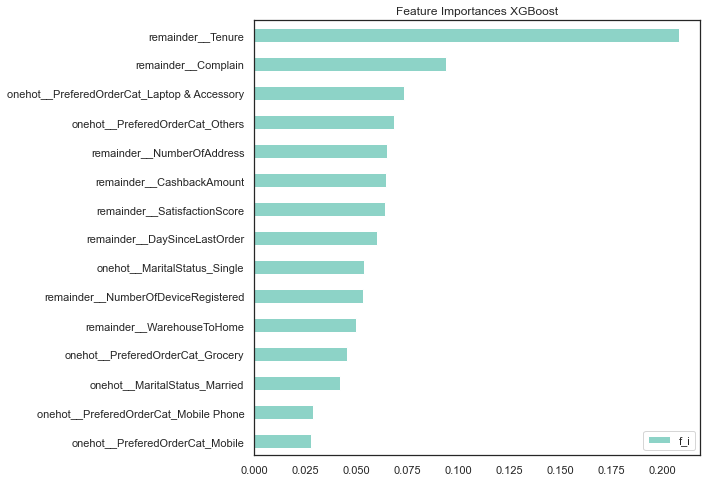

In [330]:
# mendapatkan feature names
feature_names = xgb_best_modelb[1].get_feature_names_out()

# feature importances
f_i_data = xgb_best_modelb[2].feature_importances_

# dibuat dalam bentuk dataframe
df__f_i = pd.DataFrame(data = f_i_data, index = feature_names, columns = ["f_i"]).sort_values(by = ["f_i"], ascending = True)

# kita plotkan hasilnya
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (8,8), title = "Feature Importances XGBoost")
plt.show()

FEATURE IMPORTANCES | XGBOOST

Dari grafik diatas feature yang penting adalah sebagai berikut :
Tenure
Complain
PreferedOrderCat

saya memilih fitur - fitur tersebut karena setelah PreferedOrderCat, besar koefisiennya tidak terlalu signifikan.

## 4.7.1. BEST MODEL WITH CURRENT FEATURE

In [331]:

# menampilkan dataframe secara keseluruhan untuk X dan Y
display_side_by_side(X.head(5), pd.DataFrame(y, columns = ["Churn"]).head(5), titles = ["X for features", "Y for target"])

X for features 
 
 
 
 Tenure 
 WarehouseToHome 
 NumberOfDeviceRegistered 
 PreferedOrderCat 
 SatisfactionScore 
 MaritalStatus 
 NumberOfAddress 
 Complain 
 DaySinceLastOrder 
 CashbackAmount 
 
 
 
 
 0 
 15.0 
 29.0 
 4 
 Laptop & Accessory 
 3 
 Single 
 2 
 0 
 7.0 
 143.32 
 
 
 1 
 7.0 
 25.0 
 4 
 Mobile 
 1 
 Married 
 2 
 0 
 7.0 
 129.29 
 
 
 2 
 27.0 
 13.0 
 3 
 Laptop & Accessory 
 1 
 Married 
 5 
 0 
 7.0 
 168.54 
 
 
 3 
 20.0 
 25.0 
 4 
 Fashion 
 3 
 Divorced 
 7 
 0 
 3.0 
 230.27 
 
 
 4 
 30.0 
 15.0 
 4 
 Others 
 4 
 Single 
 8 
 0 
 8.0 
 322.17 
 
 
 Y for target 
 
 
 
 Churn 
 
 
 
 
 0 
 0 
 
 
 1 
 0 
 
 
 2 
 0 
 
 
 3 
 0 
 
 
 4 
 0

In [332]:
# menampilkan hasil train test split
display_side_by_side(X_train.head(5), X_test.head(5), titles = ["X Data Train", "X Data Test"])
display_side_by_side(pd.DataFrame(y_train, columns = ["Churn"]).head(5), pd.DataFrame(y_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3032,1.0,11.0,5,Laptop & Accessory,2,Single,3,1,4.0,169.87
2081,3.0,14.0,4,Mobile Phone,5,Single,5,0,3.0,145.62
661,3.0,6.0,4,Fashion,3,Single,2,0,8.0,184.74
1998,9.0,30.0,3,Laptop & Accessory,4,Married,8,0,8.0,156.74
859,1.0,30.0,4,Fashion,5,Married,11,1,3.0,224.50
,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1899,1.0,13.0,2,Mobile Phone,5,Divorced,3,1,1.0,141.01
975,9.0,23.0,4,Mobile,4,Divorced,2,0,0.0,121.27
1009,7.0,14.0,3,Laptop & Accessory,5,Divorced,6,0,2.0,165.00
2236,6.0,9.0,3,Mobile,3,Married,2,1,0.0,129.09


,Churn
3032,0
2081,0
661,0
1998,0
859,1
,Churn
1899,1
975,0
1009,0
2236,0


In [333]:
# kembali buat pipeline dengan best model yang telah di tuning pada tahap sebelumnya.
# parameter oversampling dan transformer tidak ada yang berubah. bisa kita gunakan kembali.
xgb_pipe_f = Pipeline([
    ("undersampling", rus),
    ("preprocessing",transformer),
    ("xgb_best_model", xgb_best_modelb[2])
    ])

In [358]:
# kita kembali training datanya.
xgb_pipe_f.fit(X_train, y_train)

# kita keluarkan kelas prediksinya
y_pred_class_final = xgb_pipe_f.predict(X_test)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("XGBoost Tuned Final model : GradientBoost Classifier with best parameter")
print("--"*32,"\nXGBoost Tuned Final model - No Feature Selection\n","--"*32, "\n", classification_report(y_test, y_pred_class_final))

XGBoost Tuned Final model : GradientBoost Classifier with best parameter
---------------------------------------------------------------- 
XGBoost Tuned Final model - No Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       544
           1       0.55      0.96      0.70       106

    accuracy                           0.87       650
   macro avg       0.77      0.90      0.81       650
weighted avg       0.92      0.87      0.88       650



## 4.7.2. BEST MODEL WITH SELECTED FEATURE

In [335]:
# Menyiapkan data X dan Y. X hanya feature terpilih saja.
# Y sama. tapi kita beri nama variabel yang berbeda saja agar seragam dengan X nya.
X_fs = df[["Tenure", "Complain", "PreferedOrderCat", "NumberOfAddress", "CashbackAmount", "SatisfactionScore"]]
y_fs = df["Churn"]

In [336]:
# menampilkan data untuk data yang telah difeature selection
display_side_by_side(X_fs.head(5), pd.DataFrame(y_fs, columns = ["Churn"]).head(5), titles = ["X_fs for selected features", "y_fs for target"])

X_fs for selected features 
 
 
 
 Tenure 
 Complain 
 PreferedOrderCat 
 NumberOfAddress 
 CashbackAmount 
 SatisfactionScore 
 
 
 
 
 0 
 15.0 
 0 
 Laptop & Accessory 
 2 
 143.32 
 3 
 
 
 1 
 7.0 
 0 
 Mobile 
 2 
 129.29 
 1 
 
 
 2 
 27.0 
 0 
 Laptop & Accessory 
 5 
 168.54 
 1 
 
 
 3 
 20.0 
 0 
 Fashion 
 7 
 230.27 
 3 
 
 
 4 
 30.0 
 0 
 Others 
 8 
 322.17 
 4 
 
 
 y_fs for target 
 
 
 
 Churn 
 
 
 
 
 0 
 0 
 
 
 1 
 0 
 
 
 2 
 0 
 
 
 3 
 0 
 
 
 4 
 0

Kita perlu kembali melakukan splitting data untuk feature terpilih ini. untuk parameter sama, hanya datanya menggunakan feature terpilih

In [337]:
# Split data untuk data training dan testing
# parameter trantestsplit adalah sama dengan yang dilakukan pada data dengan full feature
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size = 0.2, stratify = y, random_state = 0)

In [338]:
# hanya menampilkan output hasil splitting
display_side_by_side(X_fs_train.head(5), X_fs_test.head(5), titles = ["X_train with selected feature", "X_test with selected feature"])
display_side_by_side(pd.DataFrame(y_fs_train, columns = ["Churn"]).head(5), pd.DataFrame(y_fs_test, columns = ["Churn"]).head(5), titles = ["TargetTrain", "TargetTest"])

,Tenure,Complain,PreferedOrderCat,NumberOfAddress,CashbackAmount,SatisfactionScore
3032,1.0,1,Laptop & Accessory,3,169.87,2
2081,3.0,0,Mobile Phone,5,145.62,5
661,3.0,0,Fashion,2,184.74,3
1998,9.0,0,Laptop & Accessory,8,156.74,4
859,1.0,1,Fashion,11,224.50,5
,Tenure,Complain,PreferedOrderCat,NumberOfAddress,CashbackAmount,SatisfactionScore
1899,1.0,1,Mobile Phone,3,141.01,5
975,9.0,0,Mobile,2,121.27,4
1009,7.0,0,Laptop & Accessory,6,165.00,5
2236,6.0,1,Mobile,2,129.09,3


,Churn
3032,0
2081,0
661,0
1998,0
859,1
,Churn
1899,1
975,0
1009,0
2236,0


In [339]:
# karena feature selection, ada beberapa penyesuaian untuk proses preprocessingnya. akan dijelaskan dibawah ini

# metode resampling : undersampling - Random Under Sampling
# karena jumlah feature berkurang. perlu didefinisikan ulang.

# untuk parameter categorical_feature, hanya ada PreferedOrderCat
rus = RandomUnderSampler(random_state = 0)

# transformer perlu kita definsikan ulang karena jumlah feature yang berbeda. kita definisikan kembali dibawah ini. 
transformer_fs = ColumnTransformer([
    ("ohe_fs", OneHotEncoder(drop = "first"), ["PreferedOrderCat"])]
    , remainder = "passthrough")

# selanjutnya kita bisa mendefinisikan pipeline kembali dengan preprocessing yang sudah mengakomodir feature selection
xgb_pipe_f_fs = Pipeline([
    ("undersampling_fs", rus),
    ("preprocessing_fs",transformer_fs),
    ("xgb_best_model", xgb_best_modelb[2])
    ])

In [357]:
# kita training pipeline feature selection, ingat pipeline adalah berdasarkan feature selection
# perhatikan juga data yang digunakan adalah yang telah di feature select.
xgb_pipe_f_fs.fit(X_fs_train, y_fs_train)

# kita keluarkan kelas prediksinya
y_pred_class_final_fs = xgb_pipe_f_fs.predict(X_fs_test)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("XGBoost Tuned Final model : XGBoost Classifier with best parameter")
print("--"*32,"\nXGBoost Tuned Final model - With Feature Selection\n","--"*32, "\n", classification_report(y_fs_test, y_pred_class_final_fs))

XGBoost Tuned Final model : XGBoost Classifier with best parameter
---------------------------------------------------------------- 
XGBoost Tuned Final model - With Feature Selection
 ---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       544
           1       0.51      0.93      0.66       106

    accuracy                           0.84       650
   macro avg       0.75      0.88      0.78       650
weighted avg       0.91      0.84      0.86       650



## 4.7.3. RECAP FOR FEATURE IMPORTANCE & FEATURE SELECTION

In [341]:
# print default classification report to validate custom dataframe class.report
print("\n\nDefault classification report to validate dataframe above")
print("--"*32)
print("XGB Tuned Final model - No Feature Selection")
print("--"*32)
print(classification_report(y_test, y_pred_class_final), "\n\n")

print("--"*32)
print("XGB Tuned Final model - With Feature Selection")
print("--"*32)
print(classification_report(y_fs_test, y_pred_class_final_fs))



Default classification report to validate dataframe above
----------------------------------------------------------------
XGB Tuned Final model - No Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       544
           1       0.55      0.96      0.70       106

    accuracy                           0.87       650
   macro avg       0.77      0.90      0.81       650
weighted avg       0.92      0.87      0.88       650
 


----------------------------------------------------------------
XGB Tuned Final model - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       544
           1       0.51      0.93      0.66       106

    accuracy                           0.84       650
   macro avg       0.75      0.88      0

# 5. CONCLUSION

                                    **CONCLUSION ABOUT DATA**

- Dari hasil EDA, dapat dilihat bahwa data kita imbalance (84%:16%)

- Hasil EDA juga menunjukkan ada data yang diduplikat (telah dihapus) dan ada missing value (yang diisi menggunakan median diawal)

- Churn merupakan hal yang wajar tetapi sebaik mungkin dikurangi, berikut penjelasan mengenai feature yang berpengaruh terhadap churn:
    - Feature tenure menunjukkan berapa lama customer menggunakan aplikasi, sebelumnya kita sudah melakukan EDA dan dilihat bahwa feature ini berkorelasi negatif terhadap churn, jadi semakin sedikit jumlah bulan pada tenure menunjukkan customer cenderung churn.
    - Feature complaint menunjukkan korelasi positif pada EDA sebelumnya, hal ini menunjukkan bahwa jika customer complain maka mereka cenderung churn dan mencari ecommerce yang lebih baik atau cara berbelanja lain seperti offline.
    - Pada feature prefered category sebenarnya hanya jenis Laptop & accessory dan others saja yang memiliki nilai coef yang tinggi dan akhirnya saya menggunakan feature ini.
    - Feature Number Of Address, Cashback Amount, Satisfaction Score memiliki nilai coeff yang sangat mirip
        - Jika mengacu kepada korelasi terhadap churn, nilai korelasi feature Number Of Address dan Satisfaction Score sangat kecil (0.032 dan 0.098) tetapi menurut feature importance feature ini cukup penting, maka dari itu tetap saya gunakan
        - Untuk feature Cashback amount, nilai korelasinya negatif dan lebih tinggi dibandingkan feature Number Of Address dan Satisfaction, menunjukkan semakin sedikit cahsback amount yang diberikan semakin tinggi kecenderungan chrun.

                                    **MACHINE LEARNING MODEL**

- Data ditreatment dengan metode resampling yaitu metode STOMENC (Oversampling) dan RandomUndersampling(Undersampling), dan hasil menunjukkan lebih baik menggunakan RandomUnderSampling
- Saya menekankan kepada nilai Recall agar mengurangi False Negatif berdasarkan Business Understanding yang sudah saya jelaskan sebelumnya
- Setelah melakukan permodelan hasil nilai recall yang baik ada pada model Random Forest dan XGBoost.
- Tetapi setelah dilakukan hyperparameter tuning, Machine learning yang digunakan adalah model XGBoost
- Feature importance menunjukkan bahwa feature Tenure (nilai coef paling tinggi), diikuti Complain, Prefered Order Category, serta ketiga feature (Number Of Address, Cashback Amount, Satisfaction Score) memiliki nilai yang sangat mirip, feature-feature ini merupakan feature yang paling penting, saya memilih menggunakan beberapa feature ini saja walaupun nilai recall sedikit turun (sekitar 3%) tetapi mengurangi feature dapat mengurangi dimensionality of the model dan meningkatkan kecepatan model bekerja (sumber: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.)

In [359]:
print("--"*32)
print("XGBoost Tuned Final model - With Feature Selection")
print("--"*32)
print(classification_report(y_fs_test, y_pred_class_final_fs))

----------------------------------------------------------------
XGBoost Tuned Final model - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       544
           1       0.51      0.93      0.66       106

    accuracy                           0.84       650
   macro avg       0.75      0.88      0.78       650
weighted avg       0.91      0.84      0.86       650



Berdasarkan hasil classification report dari model, dapat disimpulkan bahwa bila seandainya nanti kita menggunakan model kita untuk mencari tahu customer mana yang akan churn, maka model kita dapat mengetahui 83% kandidat yang **tidak akan churn** dan 93% customer yang *churn*

Model ini memiliki ketepatan prediksi customer *churn* sebesar 51% (precisionnya), jadi setiap model memprediksi bahwa seorang customer itu *churn* dengan kemungkinan tebakannya benar itu sebesar lebih kurang 50% . Maka masih akan ada customer **tidak akan churn**  tetapi diprediksi sebagai customer *churn* sekitar 17% dari keseluruhan customer **tidak akan churn**  (berdasarkan recall).

Bila seandainya rata-rata belanja setiap customer tiap bulannya adalah sebesar $500, dan andaikan jumlah customer yang kita miliki untuk suatu kurun waktu sebanyak 1000 orang (dimana andaikan 300 customer *churn* dan 700 customer **tidak akan churn**), maka hitungannya kurang lebih akan seperti ini :

*Tanpa Model*

Total Lost => 300 x $500 = $ 150,000 (karena 300 customer *churn*, dan perusahaan ecommerce *tidak* melakukan tindakan apapun untuk memberhentikan customer *churn*)

*Dengan Model* :

Kita dapat mengetahui 279 customer yang AKTUAL nya akan *churn* (300 * 93%, based on recall*)
sebanyak 21 customer *churn* salah tebak (300 (1 - 93%), (1 - recall score*))
Disini saya sedikit berasumsi bahwa dengan langkah - langkah yang dilakukan perusahaan, perusahaan dapat mempertahankan 100 customer dari 300 customer yang seharusnya *churn* <br>

Sehingga perbandingan antara customer *churn* dengan yang **tidak akan churn** adalah sebagai berikut : <br>
- 200 customer *churn* dari yang awalnya 300 <br>
- 800 customer **tidak akan churn**  dari yang awalnya 700 <br>
- Berdasarkan perhitungan sederhana tersebut, dari yang awalnya perusahaan kehilangan sebesar $150,000 setelah dilakukan tindakan, kehilangan yang terjadi menjadi sebesar 200 x $500 = $100,000. Artinya ada loss reduction sebesar $50,000. Dan dengan laporan yang komperhensif diatas, perusahaan jadi tau tindakan apa yang harus dilakukan untuk mereduksi terjadinya customer churn

# 6. RECOMMENDATION

- Menurut Xiahou & Harada (2022), website B2C shopping memiliki banyak informasi customer behavior, seperti waktu shopping, klik pada product pages, barang pada keranjang, dan frequency shopping. Dan informasi ini dapat menjadi feature yang dapat membuat prediksi customer churn labih akurat. Didata ini, belum ada beberapa feature yang disebutkan pada literatur. Maka feature yang tidak terlalu penting mungkin dapat diganti oleh feature-feature baru seperti yang literatur sebutkan.
- Feature yang paling penting padaa customer churn adalah tenure dan complain. 
    - Customer paling banyak churn langsung setelah bulan pertama dan ini harus dicari tahu penyebabnya
    - Tidak ada elaborasi lebih lanjut mengapa customer bisa complain. Perusahaan harus mencari tahu lebih lanjut dan menemukan alasan kenapa customer bisa complain. Karena dari complain customer akan cenderung churn, apalagi dengan banyaknya pilihan ecommerce yang ada pada saat ini.
- Untuk permodelan, saya melakukan hyperparametertuning xboost sebanyak dua kali dikarenakan pada hyperparameter pertama, hasil dataset test menunjukkan nilai setelah tuning malah lebih jelek. Maka, harus dicari lagi parameter terbaik hanya untuk sekali hyperparametertuning xgboost pada dataset ini.

# 7. DEPLOYMENT

*MACHINE LEARNING MODELING*

- Data yang kita punya adalah data yang saya split menjadi data training dan data test (80% data training dan 20% data test), sehingga dapat melatih model dan memvalidasi hasilnya.
- Proses resampling, preprocessing (Encoding) dan model sudah disiapkan dalam bentuk pipeline, sehingga proses yang terjadi untuk validasi dan prediksi end to end untuk mencegah data leakage.
- Setelah memvalidasi model dengan cross validasi dan datatest dan hasilnya baik, kita akan masuk ke deployment.
- Tetapi keseluruhan proses validasi sebelumnya menggunakan keseluruhan data dengan pembagian data training dan data test (80% data training dan 20% data test)

*DEPLOYMENT*

Maka untuk deployment, akan mengembalikan bentuk semua data training menjadi training + validation set
Dengan proses ini, model dapat belajar data lebih banyak (dibandingkan jika saya langsung deploy dari tahap Machine learning Modeling karena ada data yang tidak digunakan yaitu test set)
Dengan model mempelajari data lebih banyak diharapkan hasil prediksinya juga akan lebih baik.
Berdasarkan penjelasan tersebut, kita awali dengan persiapan deployment

                                    **DEPLOYMENT PREPARATION**

**Data Preparation**

In [343]:
X_train_dep = df[["Tenure", "Complain", "PreferedOrderCat", "NumberOfAddress", "CashbackAmount", "SatisfactionScore"]]
y_train_dep = df["Churn"]

In [344]:
# pada bagian ini saya hanya memperlihatkan datanya saja
print("Shape Data X = ", X_train_dep.shape)
print("Shape Data y = ", y_train_dep.shape)
display_side_by_side(X_train_dep.head(5), pd.DataFrame(y_train_dep, columns = ["Churn"]).head(5), titles = ["X_train_deployment", "y_train_deployment"])

Shape Data X =  (3250, 6)
Shape Data y =  (3250,)


X_train_deployment 
 
 
 
 Tenure 
 Complain 
 PreferedOrderCat 
 NumberOfAddress 
 CashbackAmount 
 SatisfactionScore 
 
 
 
 
 0 
 15.0 
 0 
 Laptop & Accessory 
 2 
 143.32 
 3 
 
 
 1 
 7.0 
 0 
 Mobile 
 2 
 129.29 
 1 
 
 
 2 
 27.0 
 0 
 Laptop & Accessory 
 5 
 168.54 
 1 
 
 
 3 
 20.0 
 0 
 Fashion 
 7 
 230.27 
 3 
 
 
 4 
 30.0 
 0 
 Others 
 8 
 322.17 
 4 
 
 
 y_train_deployment 
 
 
 
 Churn 
 
 
 
 
 0 
 0 
 
 
 1 
 0 
 
 
 2 
 0 
 
 
 3 
 0 
 
 
 4 
 0

In [345]:
rus

RandomUnderSampler(random_state=0)

In [346]:
# transformer dengan fitur terpilih saja. sudah sesuai dengan data deployment yang dipersiapkan
transformer_fs

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_fs', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat'])])

In [347]:
# disini saya kembali definisikan modelnya
model_xgb_dep = XGBClassifier(booster='dart', nthread=91, max_depth = 10, min_child_weight= 1, sampling_method= 'gradient_based', tree_method='exact')


# membuat pipeline
xgb_pipe_dep = Pipeline([
    ("oversampling_fs_dep", rus),
    ("preprocessing_fs_dep",transformer_fs),
    ("xgb_dep", model_xgb_dep)
    ])

# membuat hyperparameter space, ingat parameter default harus ada di paramspace
# parameter ini sama dengan yang telah dilakukan sebelumnya. tapi tidak apa saya state ulang.
xgb_param_space_dep = {
    'xgb_dep__sample_type' : ['uniform','weighted'], 
    'xgb_dep__rate_drop' : [0.1, 0.075, 0.125, 0.05],
    'xgb_dep__skip_drop' : [0.1, 0.075, 0.125, 0.05]
}

# membuat grid search CVnya
xgb_grid_Search_dep = GridSearchCV(
                       xgb_pipe_dep, 
                       param_grid = xgb_param_space_dep,
                       cv = skfold,
                       scoring = "recall",
                       n_jobs = -1)

In [348]:
# Training Grid Search CV Gradient Boost dengan data deployment, ingat, data telah di feature select.
xgb_grid_Search_dep.fit(X_train_dep, y_train_dep)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('oversampling_fs_dep',
                                        RandomUnderSampler(random_state=0)),
                                       ('preprocessing_fs_dep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_fs',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat'])])),
                                       ('xgb_dep',
                                        XGBClassifier(base_score=None,
                                                      boost...
                                                      min_child_weight=1,
                                                      missing=nan,
                        

In [349]:
# best parameter untuk *XGboost* dengan data deployment
best_param_dep_data = pd.DataFrame(xgb_grid_Search_dep.best_params_, index = [0]).T
best_param_dep_data.rename({0 : "params_value"}, axis = 1, inplace = True)

# best score untuk *XGBoost* awal dengan 0.8 data train
print("best score GB - 0.8 data train - all features : ", gridsearch.best_score_)

# best score untuk *XGBoost* awal dengan 1 data train (data deployment)
print("best score GB - data deployment - featureselect: ", xgb_grid_Search_dep.best_score_)

# kita bandingkan best parameter untuk *XGboost* pada saat hyperparameter tuning di awal tadi dengan data deployment 
display_side_by_side(xgb_best_param_0_8_trainb, best_param_dep_data, titles = ["bestparam - all features - 0.8datatrain", "bestparam - selected features - data deployment"])

best score GB - 0.8 data train - all features :  0.8848153214774281
best score GB - data deployment - featureselect:  0.8591606418621055


,parameter_value
modelb__rate_drop,0.125
modelb__sample_type,uniform
modelb__skip_drop,0.125
,params_value
xgb_dep__rate_drop,0.125
xgb_dep__sample_type,weighted
xgb_dep__skip_drop,0.1


Note:
- Dari data diatas ada perbedaan terhadap sample type yang awalnya uniform menjadi weighted serta skip drop dari 0.125 menjadi 0.1
- terjadi pengurangan nilai best score sebanyak 3% 
- Untuk deployment akan menggunakan model baru dengan parameter terbaik sebagai berikut:
    - 'xgb_dep__rate_drop': [0.1, 0.075, 0.125, 0.05], <br>
    - 'xgb_dep__sample_type': ['uniform', 'weighted'], <br>
    - 'xgb_dep__skip_drop': [0.1, 0.075, 0.125, 0.05]} <br>
- untuk hyperparameter yang menggunakan 80% data train dengan model terpilih, sudah menangkap pola data yang ada (dilihat dari hasil cv score dan hyperparameter yang tidak berbeda jauh antara model dengan 80% data train dengan 100% data train (data deployment))



**SAVE MODEL**

In [350]:
xgb_grid_Search_dep.best_params_

{'xgb_dep__rate_drop': 0.125,
 'xgb_dep__sample_type': 'weighted',
 'xgb_dep__skip_drop': 0.1}

In [351]:
# siapkan bestestimatornya
# beberapa best parameter tidak terlihat, bisa melihat cell code diatasnya.
xgb_grid_Search_dep.best_estimator_

Pipeline(steps=[('oversampling_fs_dep', RandomUnderSampler(random_state=0)),
                ('preprocessing_fs_dep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_fs',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat'])])),
                ('xgb_dep',
                 XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, earl...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=10, max_leaves=0, min_child_we

In [352]:
# penamaan file pickle
filename = "Ecommercechurnpredict.sav"

# export .sav sebagai file
pickle.dump(xgb_grid_Search_dep.best_estimator_, open(filename, "wb"))

**LOAD MODEL**

In [353]:
# nama file pickle
filename = "Ecommercechurnpredict.sav"

# perintah untuk load model
loaded_model = pickle.load(open(filename, "rb"))

In [354]:
X_train_dep = df[["Tenure", "Complain", "PreferedOrderCat", "NumberOfAddress", "CashbackAmount", "SatisfactionScore"]]

In [355]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


**PREDICT MODEL**

In [356]:
# create 1 dummy data to predict
df_1_test = pd.DataFrame({
    "Tenure" : [1.0],
    "Complain" : [1],
    "PreferedOrderCat" : ['Laptop & Accessory'],
    "NumberOfAddress": [5],
    "CashbackAmount": [120.0],
    "SatisfactionScore": [3]
    })


# print sample data
display_side_by_side(df_1_test, titles = ["Dummy Customer Data"])

# predict that data
print("predict proba :",loaded_model.predict_proba(df_1_test))
print("predict class :",loaded_model.predict(df_1_test))

,Tenure,Complain,PreferedOrderCat,NumberOfAddress,CashbackAmount,SatisfactionScore
0,1.0,1,Laptop & Accessory,5,120.0,3


predict proba : [[0.11405665 0.88594335]]
predict class : [1]


Dari data diatas, dapat dilihat kreteria customer sebagai berikut:
- Tenur selama 1 bulan
- Melakukan complaint
- Memiliki Jumlah alamat 5
- Mendapatkan cash back sebanyak $120 
- Dan tingkat kepuasan cukup puas

Memiliki probabilitas churn sebesar 88,6%